In [1]:
from __future__ import division
from more_itertools import peekable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as scp
import pickle
import magenta
import os, time, re, json
%matplotlib inline
from IPython.core.display import display, HTML
### change width of notebook display
display(HTML("<style>.container { width:70% !important; }</style>"))

import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# for exposing API
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from flask import Flask
from flask_restful import Resource, Api

JUPYTER_PICKLE_FILE = "config/shared_jupyter_data.pkl"
def write_shared_jupyter(key, value, path=JUPYTER_PICKLE_FILE, overwrite=False):
    if (os.path.exists(path)):
        with open(path, "rb") as fp:
            shared_jupyter_data = pickle.load(fp)
        if overwrite:
            shared_jupyter_data = {key: value}
        else:
            shared_jupyter_data[key] = value
    else:
        shared_jupyter_data = {key: value}
    with open(path, 'wb') as fp: 
        pickle.dump(shared_jupyter_data, fp)

def read_shared_jupyter(key=None, path=JUPYTER_PICKLE_FILE):
    if (os.path.exists(path)):
        with open(path, "rb") as fp:
            shared_jupyter_data = pickle.load(fp)
            if key is not None:
                if key in shared_jupyter_data:
                    return(shared_jupyter_data[key])
                else:
                    print("Not found!")
                    return(None)
            else:
                return(shared_jupyter_data)
    else:
        print("No data")

def pandasToJson(df):
    return(df.to_json(orient="split"))
def jsonToPandas(json):
    return(pd.read_json(json, orient="split"))

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

FIG_WIDTH = 1200
FIG_HEIGHT = 800

PITCH_MIN = 20
PITCH_MAX = 120
VELOCITY_MIN = 0
VELOCITY_MAX = 120

def hheader(x):
    print("#########################################")
    print("### {}".format(x))
    print("#########################################")

# Magenta dependencies:
# https://github.com/magenta/magenta

# Magenta uses pretty_midi to deal with midi files
import pretty_midi

C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
C:\Users\echow\Miniconda3\envs\tensorflow\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Could

# Read in music stream and make decisions

Each agent:
- Read in music stream
- Update predictive model
- Probabilistic decision rule: create order and submit

In [2]:
""" Each agent reads in music stream and responds
    (start with a single agent)
"""

import requests
from collections import OrderedDict

### Iteration parameters
STREAM_SLEEP_SEC = 1

### Agent parameters
WEALTH = 10000

iterations = 1
assetDataSoFar = OrderedDict()
initialModelTrained = False
while True:
    if (iterations % 1000 == 0):
        print("Iterations {} ...".format(iterations+1))
    
    ### Read in music stream (assume perpetual)
    currAssetData = requests.get("http://localhost:8100/read")
    if (currAssetData.status_code != 200):
        raise Exception("GET request failed.")
    currAsset = currAssetData.json()
    currAssetTime = currAsset['currTime']
    currAssetBar = jsonToPandas(currAsset['lastBar'])
    
    ### add to historical data if hasn't been seen yet
    for sx in range(currAssetBar.shape[0]):
        currAssetObs = currAssetBar.iloc[[sx]]
        currStreamingIx = currAssetObs.streaming_start_sec.values[0]
        if (currStreamingIx not in assetDataSoFar):
            assetDataSoFar[currStreamingIx] = currAssetObs
        else:
            print("Already stored")
        
    print("--------------------------------------------")
    print(currAssetTime)
    display(currAssetBar)
    
    ### Wait until have plenty of data so far (to start training a baseline model)
    ### need <<< refresh rate of streaming market infrastructure
    if (iterations < 50):
        time.sleep(STREAM_SLEEP_SEC)
        iterations += 1
        continue
        
    raise Exception("Continue with analysis below")

    """ Analysis with current order here """
    
    ### get historical data so far
    ### the current bar (currAssetBar) will be the last rows of this dataframe
    assetDataSoFar_df = pd.concat(assetDataSoFar.values())
    
    ### if model is not train, train model
    if not initialModelTrained:
        
        ### Train predictive model 
        
        initialModelTrained = True
    
    
    

    ### Take a short break between analyses (so plotly can catch up)
    ### should be >> plot auto-update interval so that all plots
    ### update basically at the same time. 
    time.sleep(STREAM_SLEEP_SEC) # 1 second is comfortable for nice UI
    iterations += 1

--------------------------------------------
1618930608.7899246


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1125,1125,1,181,181.15625,181.553254,181.47552,181.99479,"181.15625,181.15729,181.45833,181.47292,181.47...",181.20000,181.746874,181.673435,182.28854,"181.2,181.68229,181.55208,181.66458,181.56771,...",43,61.625000,64.0,81,"43,74,59,81,53,69,43,71",47,56.75,56,72,"58,62,72,54,66,47,47,48",0.04375,0.193620,0.142710,0.52500,"0.04375,0.525,0.09375,0.19167,0.08958,0.06667,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1126,1126,1,182,182.21042,182.425418,182.46667,182.75625,"182.21042,182.21146,182.46667,182.48229,182.75625",182.47083,182.740414,182.675000,183.24583,"182.47083,182.675,182.74583,182.56458,183.24583",52,62.800000,64.0,76,"52,69,76,53,64",35,47.00,50,56,"51,50,35,56,43",0.08229,0.315000,0.279170,0.48958,"0.26042,0.46354,0.27917,0.08229,0.48958",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1127,1127,1,183,183.10312,183.441405,183.33854,183.98542,"183.10312,183.16562,183.51146,183.98542",183.15729,183.609893,183.536975,184.20833,"183.15729,183.49062,183.58333,184.20833",24,55.000000,63.5,69,"60,69,67,24",44,53.25,48,73,"73,48,48,44",0.05417,0.168492,0.147400,0.32500,"0.05417,0.325,0.07188,0.22292",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1128,1128,1,184,184.13333,184.385763,184.17552,184.98542,"184.13333,184.17187,184.17396,184.17708,184.67...",184.27083,184.614235,184.415105,185.31562,"184.41042,184.34479,184.27083,184.41979,184.92...",36,49.666667,50.5,60,"60,36,53,58,43,48",40,49.50,45,73,"73,51,43,47,40,43",0.09687,0.228472,0.246875,0.33021,"0.27708,0.17292,0.09687,0.24271,0.25104,0.33021",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1129,1129,1,185,185.22500,185.589374,185.51562,185.95729,"185.225,185.50521,185.51562,185.74375,185.95729",185.44271,185.789166,185.762500,186.16979,"185.44271,185.64271,185.7625,185.92812,186.16979",43,53.200000,53.0,67,"53,67,55,48,43",45,53.60,51,69,"51,69,51,45,52",0.13750,0.199794,0.212500,0.24688,"0.21771,0.1375,0.24688,0.18438,0.2125",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930611.3988218


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1130,1130,1,186,186.18021,186.479374,186.489580,186.77604,"186.18021,186.46042,186.48958,186.49062,186.77604",186.61875,186.894584,186.748960,187.28646,"186.73646,187.28646,186.61875,186.74896,187.08229",36,50.200000,52.0,61,"36,61,52,58,44",50,61.000000,61.0,74,"66,74,54,61,50",0.12917,0.415208,0.30625,0.82604,"0.55625,0.82604,0.12917,0.25833,0.30625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1131,1131,1,187,187.07396,187.453332,187.412500,187.88437,"187.07396,187.20729,187.4125,187.68854,187.88437",187.25417,187.799166,187.832290,188.30417,"187.25417,188.30417,187.66458,187.83229,187.94062",52,59.600000,58.0,68,"52,68,56,64,58",58,70.200000,74.0,80,"59,74,80,58,80",0.05625,0.345832,0.18021,1.09687,"0.18021,1.09687,0.25208,0.14375,0.05625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1132,1132,1,188,188.13750,188.546613,188.667705,188.74479,"188.1375,188.36354,188.36771,188.66562,188.669...",188.21146,188.903256,188.804165,189.74792,"188.21146,188.41042,188.53229,188.825,188.7833...",24,49.125000,53.5,62,"52,42,62,36,24,62,60,55",54,63.750000,64.5,77,"55,54,71,68,61,77,69,55",0.04688,0.356640,0.16198,1.05208,"0.07396,0.04688,0.16458,0.15938,0.11354,1.0520...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1133,1133,1,189,189.06250,189.513717,189.580730,189.90625,"189.0625,189.25417,189.46979,189.69167,189.697...",189.23229,189.705902,189.762500,190.08958,"189.23229,189.46979,189.64271,189.91875,189.88...",45,54.333333,52.5,69,"45,50,55,69,57,50",50,60.500000,56.5,83,"50,57,56,83,63,54",0.16979,0.192185,0.18385,0.22708,"0.16979,0.21562,0.17292,0.22708,0.18437,0.18333",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1134,1134,1,190,190.11562,190.502977,190.611460,190.87917,"190.11562,190.32604,190.34896,190.61146,190.61...",190.28438,190.819941,190.936460,191.30000,"190.28438,190.93646,190.39375,191.3,190.69792,...",36,48.571429,45.0,63,"45,36,38,63,54,60,44",50,67.285714,70.0,80,"63,60,50,80,75,73,70",0.04479,0.316964,0.29062,0.68854,"0.16875,0.61042,0.04479,0.68854,0.08021,0.3354...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930614.0071094


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1135,1135,1,191,191.15104,191.498750,191.443750,191.91250,"191.15104,191.26771,191.44375,191.71875,191.9125",191.24688,191.803752,191.822920,192.28646,"191.24688,192.28646,191.69167,191.82292,191.97083",54,61.600000,60.0,70,"54,70,58,66,60",63,77.200000,78.0,87,"72,86,87,63,78",0.05833,0.305000,0.104170,1.01875,"0.09583,1.01875,0.24792,0.10417,0.05833",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1136,1136,1,192,192.14583,192.579036,192.692710,192.77604,"192.14583,192.39792,192.39896,192.69271,192.69...",192.22083,192.945053,192.838020,193.76875,"192.22083,192.43125,192.58125,192.81042,192.86...",24,50.625000,55.5,64,"54,44,64,24,36,64,62,57",62,73.500000,74.5,85,"62,64,78,76,73,85,78,72",0.03333,0.366015,0.177605,1.01042,"0.075,0.03333,0.18229,0.11771,0.17292,1.01042,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1137,1137,1,193,193.13542,193.624554,193.738540,193.98542,"193.13542,193.31771,193.51042,193.73854,193.74...",193.28229,193.793601,193.914580,194.08958,"193.28229,193.52917,193.69271,193.99792,193.91...",45,55.142857,52.0,71,"45,52,57,71,59,52,50",40,61.714286,64.0,88,"48,64,70,88,74,48,40",0.06354,0.169046,0.170830,0.25937,"0.14687,0.21146,0.18229,0.25937,0.17083,0.1489...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1138,1138,1,194,194.13333,194.518750,194.594795,194.83854,"194.13333,194.35104,194.59271,194.59688,194.6,...",194.27812,194.848088,194.921875,195.18125,"194.27812,194.87604,195.18125,194.67604,194.96...",36,51.333333,50.5,65,"45,36,65,56,62,44",69,79.166667,80.5,85,"69,80,81,81,79,85",0.07917,0.329340,0.319270,0.58854,"0.14479,0.525,0.58854,0.07917,0.36771,0.27083",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1139,1139,1,195,195.07812,195.402916,195.336460,195.81771,"195.07812,195.17187,195.33646,195.61042,195.81771",195.15833,195.615000,195.667710,195.89062,"195.15833,195.89062,195.48542,195.66771,195.87292",53,63.000000,62.0,72,"53,72,60,68,62",79,87.000000,88.0,95,"80,88,95,79,93",0.05521,0.212084,0.080210,0.71875,"0.08021,0.71875,0.14896,0.05729,0.05521",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930616.613244


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1140,1140,1,196,196.05729,196.612731,196.770830,196.82396,"196.05729,196.32292,196.32292,196.76979,196.77...",196.11979,196.821989,196.983330,197.18021,"196.11979,196.36562,196.51562,196.93854,196.98...",24,51.888889,55.0,66,"53,44,66,24,36,63,55,66,60",80,89.777778,90.0,98,"85,85,98,96,93,88,90,93,80",0.04271,0.209260,0.212500,0.36771,"0.0625,0.04271,0.19271,0.16875,0.2125,0.36771,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1141,1141,1,197,197.15417,197.515277,197.489060,197.94687,"197.15417,197.28854,197.41458,197.56354,197.72...",197.28438,197.667535,197.623435,198.10417,"197.28438,197.37812,197.48437,197.7625,197.991...",43,55.166667,55.5,66,"43,51,54,57,60,66",73,78.666667,76.0,92,"74,76,81,76,73,92",0.06979,0.152257,0.143750,0.26771,"0.13021,0.08958,0.06979,0.19896,0.26771,0.15729",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1142,1142,1,198,198.03646,198.531713,198.600000,198.94271,"198.03646,198.16979,198.29687,198.45417,198.6,...",198.09792,198.628124,198.666670,199.05312,"198.09792,198.29375,198.33021,198.54271,198.66...",43,60.111111,60.0,81,"81,60,57,51,43,67,55,60,67",64,79.666667,80.0,99,"99,64,73,79,80,81,85,76,80",0.03333,0.096413,0.096880,0.16146,"0.06146,0.12396,0.03333,0.08854,0.06667,0.1614...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1143,1143,1,199,199.00625,199.357441,199.377080,199.87292,"199.00625,199.00625,199.01771,199.37708,199.53...",199.06042,199.484523,199.577080,200.16771,"199.06042,199.07708,199.06875,199.57708,199.68...",28,51.857143,55.0,72,"28,40,72,48,55,60,60",72,87.428571,88.0,97,"93,95,97,72,80,88,87",0.05104,0.127083,0.072920,0.29479,"0.05417,0.07083,0.05104,0.2,0.14583,0.07292,0....",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1144,1144,1,200,200.12083,200.506381,200.615105,200.88542,"200.12083,200.16771,200.36875,200.60625,200.62...",200.23021,200.570312,200.669790,200.91667,"200.29271,200.23021,200.39583,200.67396,200.71...",48,63.250000,63.5,79,"67,79,60,57,71,69,55,48",43,75.250000,81.5,96,"88,96,74,52,86,82,43,81",0.02708,0.063933,0.047395,0.17188,"0.17188,0.0625,0.02708,0.06771,0.08958,0.02917...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930621.8415911


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1150,1150,1,206,206.21771,206.490418,206.442710,206.90000,"206.21771,206.225,206.44271,206.66667,206.9",206.38854,206.668750,206.659380,206.97396,"206.42604,206.38854,206.65938,206.89583,206.97396",43,56.200000,53.0,74,"59,74,52,53,43",75,78.600000,77.0,88,"75,88,76,77,77",0.07396,0.178334,0.208330,0.22917,"0.20833,0.16354,0.21667,0.22917,0.07396",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1151,1151,1,207,207.16354,207.420660,207.301045,207.80417,"207.16354,207.17083,207.17292,207.42917,207.78...",207.46042,207.748958,207.838020,207.94583,"207.47292,207.94583,207.46042,207.80521,207.93...",36,56.666667,59.0,73,"65,58,60,36,73,48",67,81.666667,84.5,91,"87,82,76,87,91,67",0.06667,0.328300,0.298440,0.77500,"0.30938,0.775,0.2875,0.37604,0.15521,0.06667",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1152,1152,1,208,208.02500,208.522742,208.639060,208.78750,"208.025,208.2625,208.50729,208.77083,208.78333...",208.29062,208.757985,208.909375,209.04687,"208.29062,208.4125,209.04687,208.97917,208.896...",48,55.500000,56.5,64,"48,58,48,64,55,60",60,75.833333,75.5,88,"76,88,60,85,75,71",0.11354,0.235240,0.179165,0.53958,"0.26562,0.15,0.53958,0.20833,0.11354,0.13437",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1153,1153,1,209,209.01562,209.367290,209.372920,209.70312,"209.01562,209.36458,209.37292,209.38021,209.70312",209.10312,209.946454,210.001040,210.50937,"209.10312,210.50937,209.94687,210.17187,210.00104",29,49.200000,56.0,65,"36,65,56,60,29",79,84.400000,86.0,89,"80,88,86,79,89",0.08750,0.579168,0.573960,1.14479,"0.0875,1.14479,0.57396,0.79167,0.29792",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1154,1154,1,210,210.00625,210.467708,210.473960,210.93229,"210.00625,210.23125,210.47188,210.47604,210.68...",210.05729,210.633507,210.606770,211.17292,"210.05729,210.60312,210.61042,210.56354,210.79...",41,51.000000,48.0,72,"41,48,56,72,48,41",65,78.666667,79.0,91,"85,77,81,91,65,73",0.05104,0.165797,0.121875,0.37187,"0.05104,0.37187,0.13854,0.0875,0.10521,0.24062",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930624.4653156


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1155,1155,1,211,211.14271,211.452292,211.45000,211.76354,"211.14271,211.44896,211.45,211.45625,211.76354",211.19687,211.794164,211.80104,212.17812,"211.19687,212.17812,211.80104,211.73125,212.06354",29,48.800000,57,64,"29,64,59,57,35",72,79.000000,80,84,"79,84,80,72,80",0.05417,0.341876,0.30000,0.72917,"0.05417,0.72917,0.35104,0.275,0.3",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1156,1156,1,212,212.04687,212.338956,212.27708,212.78229,"212.04687,212.06771,212.27708,212.52083,212.78229",212.13125,212.610206,212.54167,213.39062,"212.25937,212.13125,212.54167,212.72812,213.39062",47,53.800000,47,71,"71,47,47,57,47",61,75.400000,76,90,"90,72,76,78,61",0.06354,0.271248,0.21250,0.60833,"0.2125,0.06354,0.26458,0.20729,0.60833",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1157,1157,1,213,213.06354,213.427529,213.34792,213.81458,"213.06354,213.07708,213.08229,213.34792,213.79...",213.28646,214.097023,213.44687,215.39896,"213.34479,213.28646,213.31146,213.44687,215.39...",35,55.714286,59,64,"62,56,59,35,64,59,55",52,67.142857,69,76,"76,73,69,69,70,52,61",0.09896,0.669494,0.28125,1.60521,"0.28125,0.20937,0.22917,0.09896,1.60521,1.3385...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1158,1158,1,214,214.15729,214.423610,214.44375,214.66979,"214.15729,214.44375,214.66979",214.38437,214.634023,214.50312,215.01458,"214.38437,214.50312,215.01458",28,38.333333,40,47,"28,40,47",60,63.666667,64,67,"67,64,60",0.05937,0.210413,0.22708,0.34479,"0.22708,0.05937,0.34479",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1159,1159,1,215,215.00104,215.370000,215.29375,215.95521,"215.00104,215.01146,215.29375,215.58854,215.95521",215.27188,215.802292,215.94687,216.11042,"216.05,215.27188,215.63229,215.94687,216.11042",40,51.400000,48,67,"67,55,48,47,40",43,53.200000,49,70,"70,56,48,49,43",0.15521,0.432292,0.33854,1.04896,"1.04896,0.26042,0.33854,0.35833,0.15521",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930627.0903115


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1160,1160,1,216,216.44896,216.565105,216.453645,216.90417,"216.44896,216.45208,216.45521,216.90417",216.90521,217.241148,217.329170,217.40104,"217.36667,216.90521,217.40104,217.29167",41,55.000000,58.5,62,"62,57,60,41",39,49.000000,52.0,53,"52,52,53,39",0.38750,0.676040,0.685415,0.94583,"0.91771,0.45312,0.94583,0.3875",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1161,1161,1,217,217.24375,217.587847,217.638020,217.98958,"217.24375,217.25104,217.51562,217.76042,217.76...",217.45729,217.944618,217.827080,218.52188,"217.45729,217.68542,217.74583,218.52188,217.90...",50,61.000000,59.5,71,"50,69,57,71,62,57",47,63.000000,60.5,86,"47,74,54,86,67,50",0.14167,0.356772,0.294795,0.76146,"0.21354,0.43437,0.23021,0.76146,0.14167,0.35938",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1162,1162,1,218,218.23542,218.590476,218.536460,218.95312,"218.23542,218.25521,218.25833,218.53646,218.94...",218.40208,219.614137,218.586460,222.47917,"218.48333,218.40208,218.55938,218.58646,220.42...",41,60.857143,61.0,73,"72,61,50,41,73,69,60",66,77.714286,73.0,90,"90,82,66,72,89,72,73",0.05000,1.023660,0.301040,3.52604,"0.24792,0.14687,0.30104,0.05,1.4875,1.40625,3....",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1163,1163,1,219,219.40521,219.572395,219.572395,219.73958,"219.40521,219.73958",219.78021,219.869795,219.869795,219.95938,"219.78021,219.95938",42,46.000000,46.0,50,"42,50",39,42.500000,42.5,46,"46,39",0.21979,0.297395,0.297395,0.37500,"0.375,0.21979",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1164,1164,1,220,220.03229,220.477602,220.427080,220.85104,"220.03229,220.28958,220.31354,220.54062,220.83...",220.27083,221.380555,220.968750,224.35312,"220.27083,224.35312,220.47396,220.9,221.0375,2...",50,61.333333,59.5,74,"57,74,62,57,68,50",45,57.333333,53.5,76,"45,76,53,48,68,54",0.16042,0.902952,0.298960,4.06354,"0.23854,4.06354,0.16042,0.35938,0.19896,0.39687",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930629.69752


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1165,1165,1,221,221.15938,221.509118,221.502085,221.87292,"221.15938,221.49271,221.51146,221.87292",221.30312,223.363020,223.558855,225.03125,"221.30312,225.03125,225.01146,222.10625",31,51.250000,53.5,67,"42,67,65,31",34,46.250000,49,53,"48,53,50,34",0.14375,1.853905,1.866665,3.53854,"0.14375,3.53854,3.5,0.23333",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1166,1166,2,0,0.00000,0.387763,0.360940,0.82917,"0.0,0.24792,0.47396,0.82917",0.30417,0.572915,0.477080,1.03333,"0.30417,0.38958,0.56458,1.03333",38,49.500000,49.0,62,"38,45,53,62",37,47.250000,47,58,"37,41,53,58",0.09062,0.185158,0.172920,0.30417,"0.30417,0.14167,0.09062,0.20417",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,1
1167,1167,2,1,1.08750,1.471875,1.472920,1.87187,"1.0875,1.09167,1.13333,1.28229,1.29792,1.30625...",1.15937,1.618054,1.676040,2.08542,"1.29062,1.15937,1.31354,1.44271,1.47396,1.4291...",45,64.466667,67.0,76,"74,67,53,76,69,50,74,60,65,76,53,69,45,72,64",30,53.533333,54,70,"46,44,38,59,43,51,70,60,50,70,57,54,61,70,30",0.04271,0.146181,0.160420,0.26458,"0.20312,0.06771,0.18021,0.16042,0.17604,0.1229...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1168,1168,2,2,2.08333,2.504630,2.475000,2.95625,"2.08333,2.08542,2.10625,2.27917,2.475,2.72396,...",2.26562,2.773726,2.876040,3.09792,"2.26562,2.91354,2.77812,2.41458,2.51458,2.8760...",38,59.666667,62.0,76,"38,76,69,45,53,62,53,74,67",34,53.333333,52,71,"54,63,50,49,48,71,52,59,34",0.03958,0.269097,0.164580,0.82812,"0.18229,0.82812,0.67188,0.13542,0.03958,0.1520...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1169,1169,2,3,3.10000,3.477082,3.450000,3.92396,"3.1,3.10104,3.11979,3.27708,3.27812,3.3,3.4416...",3.21771,3.697014,3.602080,4.68333,"3.28333,3.24688,3.21771,3.49688,3.48021,3.3479...",38,63.733333,69.0,76,"76,50,69,60,74,65,76,53,69,45,72,64,38,76,69",47,61.266667,62,75,"62,56,52,70,73,54,75,64,59,63,74,47,55,63,52",0.04063,0.219930,0.183330,0.76875,"0.18333,0.14583,0.09792,0.21979,0.20208,0.0479...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930632.2899055


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1170,1170,2,4,4.07396,4.606134,4.697920,4.86875,"4.07396,4.26667,4.475,4.65312,4.69792,4.70312,...",4.21562,4.746873,4.807290,5.11771,"4.21562,4.30625,4.65312,4.80729,4.86042,4.7510...",45,60.000000,60,76,"45,53,60,53,74,65,45,76,69",42,54.666667,57.0,71,"42,44,71,54,61,43,57,63,57",0.03958,0.140741,0.154170,0.24896,"0.14167,0.03958,0.17812,0.15417,0.1625,0.04792...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1171,1171,2,5,5.03958,5.405058,5.394790,5.98958,"5.03958,5.03958,5.05312,5.2,5.25208,5.27083,5....",5.12083,5.582738,5.559375,6.19583,"5.19688,5.22604,5.12083,5.36458,5.33229,5.3166...",38,56.500000,55,74,"57,72,64,74,48,50,69,43,41,72,38,65,45,53",38,55.928571,52.5,77,"66,72,56,77,46,38,69,44,43,69,50,53,48,52",0.04583,0.177678,0.156770,0.59167,"0.15729,0.18646,0.06771,0.16458,0.08021,0.0458...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1172,1172,2,6,6.23646,6.649840,6.606250,6.94792,"6.23646,6.41042,6.41458,6.44479,6.57812,6.5854...",6.38750,6.773797,6.732290,7.09375,"6.3875,6.58125,6.54062,6.49583,6.73229,6.73125...",45,63.538462,65,76,"60,74,53,65,76,45,69,72,57,64,50,74,67",36,55.923077,54.0,69,"60,63,50,36,64,53,47,69,54,53,54,66,58",0.05000,0.123958,0.145830,0.17500,"0.15104,0.17083,0.12604,0.05104,0.15417,0.1458...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1173,1173,2,7,7.08750,7.339844,7.346355,7.77292,"7.0875,7.12083,7.15312,7.34167,7.35104,7.35938...",7.21979,7.658985,7.622920,8.21667,"7.27812,7.33125,7.21979,7.51146,8.16875,8.2166...",38,55.500000,56,72,"43,69,62,38,72,65,45,50",37,48.625000,46.0,65,"56,65,41,42,56,50,42,37",0.03854,0.319141,0.196355,0.85729,"0.19063,0.21042,0.06667,0.16979,0.81771,0.8572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1174,1174,2,8,8.01146,8.514779,8.542185,8.91771,"8.01146,8.18229,8.2,8.20521,8.36146,8.36146,8....",8.17917,8.691732,8.696355,9.36354,"8.17917,8.35417,8.33646,8.29271,8.475,8.51458,...",38,58.812500,62,72,"57,69,50,64,43,72,65,53,67,60,43,65,69,38,67,59",43,56.187500,55.5,66,"54,54,49,45,55,60,56,54,64,56,43,60,63,55,66,65",0.08750,0.176953,0.168230,0.46563,"0.16771,0.17188,0.13646,0.0875,0.11354,0.15312...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930634.9124227


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1175,1175,2,9,9.10000,9.446006,9.450000,9.86146,"9.1,9.10833,9.26562,9.28333,9.29271,9.44792,9....",9.22604,9.681336,9.66198,10.54896,"9.29167,9.22604,9.44583,9.35104,9.4375,9.66354...",45,59.916667,63.5,72,"69,65,67,57,45,65,69,50,53,72,62,45",48,63.083333,65.0,73,"67,56,71,67,58,68,73,63,53,73,48,60",0.06771,0.235330,0.194275,0.86562,"0.19167,0.11771,0.18021,0.06771,0.14479,0.2156...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1176,1176,2,10,10.07396,10.662915,10.755725,10.94687,"10.07396,10.35312,10.55312,10.56667,10.75208,1...",10.40417,10.835936,10.81510,11.11458,"10.40417,10.75,10.675,10.69896,10.82187,10.808...",53,62.600000,63.0,74,"55,57,69,62,72,64,55,53,74,65",50,62.600000,63.5,72,"70,59,55,50,66,63,61,66,72,64",0.04896,0.173021,0.140105,0.39688,"0.33021,0.39688,0.12187,0.13229,0.06979,0.0489...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1177,1177,2,11,11.10625,11.472569,11.468750,11.84062,"11.10625,11.11667,11.12292,11.28125,11.2875,11...",11.19479,11.651181,11.64583,12.25417,"11.32917,11.19479,11.31667,11.30938,11.34688,1...",43,65.866667,69.0,77,"43,64,72,65,74,50,57,77,69,59,71,76,77,62,72",65,73.200000,73.0,81,"69,67,73,67,76,65,65,80,76,71,79,80,81,72,77",0.02812,0.178611,0.141670,0.60417,"0.22292,0.07812,0.19375,0.02812,0.05937,0.1177...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1178,1178,2,12,12.04375,12.411459,12.454170,12.84375,"12.04375,12.04896,12.05625,12.24167,12.24375,1...",12.16042,12.582575,12.50521,13.08646,"12.26875,12.24583,12.16042,12.48646,12.30833,1...",29,73.636364,77.0,86,"81,65,77,82,76,83,74,74,29,86,83",55,73.363636,73.0,88,"78,70,72,84,76,88,73,55,70,79,62",0.03542,0.171118,0.166670,0.42188,"0.225,0.19687,0.10417,0.24479,0.06458,0.09792,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1179,1179,2,13,13.08750,13.374147,13.302080,13.87083,"13.0875,13.09896,13.11771,13.27396,13.29583,13...",13.19687,13.625566,13.47500,14.27812,"13.30208,13.19687,13.325,13.475,13.36979,13.41...",48,70.000000,72.0,84,"83,79,48,84,72,57,60,81,77,64,65",44,65.363636,65.0,78,"77,61,65,78,65,44,59,76,59,67,68",0.07396,0.251420,0.207290,0.60833,"0.21458,0.09792,0.20729,0.20104,0.07396,0.1083...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930640.111581


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1185,1185,2,19,19.13229,19.616145,19.692705,19.87500,"19.13229,19.34062,19.49271,19.51042,19.69062,1...",19.16667,19.793437,19.885940,20.07083,"19.16667,19.66562,19.70625,19.61979,19.88021,1...",60,68.300000,68,76,"60,65,74,69,76,64,72,74,62,67",47,61.600000,61.5,72,"68,53,62,47,67,58,61,72,69,59",0.03437,0.177291,0.192185,0.32500,"0.03437,0.325,0.21354,0.10938,0.18958,0.21354,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1186,1186,2,20,20.04271,20.375945,20.250000,20.86562,"20.04271,20.04479,20.05104,20.2125,20.23333,20...",20.21146,20.683523,20.572920,21.46354,"20.27083,20.21458,20.21146,20.24792,20.57292,2...",41,65.000000,65,76,"76,72,60,58,74,65,41,76,72,64,57",53,65.545455,66.0,77,"75,74,64,64,77,70,68,66,55,53,55",0.03542,0.307576,0.228120,0.89792,"0.22812,0.16979,0.16042,0.03542,0.33958,0.2447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1187,1187,2,21,21.03542,21.631011,21.604170,21.98438,"21.03542,21.23021,21.42083,21.43438,21.59479,2...",21.06875,21.803205,21.839580,22.15312,"21.06875,21.58125,21.60312,21.54896,21.80521,2...",60,68.538462,69,76,"60,65,74,69,76,64,72,74,62,67,76,72,60",52,63.846154,63.0,74,"69,58,63,52,65,60,63,71,63,62,74,73,57",0.03333,0.172196,0.182290,0.35104,"0.03333,0.35104,0.18229,0.11458,0.21042,0.2416...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1188,1188,2,22,22.12292,22.406667,22.372915,22.78750,"22.12292,22.13646,22.13646,22.34688,22.37083,2...",22.15417,22.578542,22.603645,23.07188,"22.15417,22.25208,22.41042,22.56042,22.59479,2...",41,61.500000,62,76,"58,65,74,41,72,76,48,64,57,60",51,67.500000,70.5,79,"51,71,76,68,73,75,59,70,53,79",0.02604,0.171875,0.081770,0.69687,"0.03125,0.11562,0.27396,0.21354,0.22396,0.6968...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1189,1189,2,23,23.01771,23.588596,23.580210,23.97500,"23.01771,23.21458,23.21562,23.23125,23.39375,2...",23.27500,23.710527,23.668750,24.34583,"23.36979,23.40521,23.35938,23.275,23.49896,23....",58,67.263158,68,76,"64,74,72,69,76,70,62,60,72,69,65,76,59,64,68,5...",47,67.631579,69.0,75,"65,69,65,47,70,71,63,72,74,73,68,71,68,69,74,6...",0.03229,0.121931,0.086460,0.37083,"0.35208,0.19063,0.14375,0.04375,0.10521,0.0708...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930642.7173457


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1190,1190,2,24,24.28229,24.629297,24.734380,24.97604,"24.28229,24.35833,24.37292,24.69688,24.77188,2...",24.46042,24.893750,24.931250,25.24583,"24.90208,24.46042,24.49167,24.96042,25.24583,2...",38,58.875000,60.5,76,"38,76,69,45,69,64,57,53",41,57.250000,57.5,70,"65,70,61,41,61,53,54,53",0.04896,0.264452,0.191145,0.61979,"0.61979,0.10208,0.11875,0.26354,0.47396,0.4187...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1191,1191,2,25,25.25312,25.641458,25.690105,25.88542,"25.25312,25.475,25.48854,25.50833,25.6875,25.6...",25.44583,25.795104,25.832290,26.06042,"25.44583,25.66146,25.68958,25.575,25.80833,25....",50,64.500000,66.0,76,"60,53,74,67,50,76,69,74,57,65",41,58.200000,54.5,75,"75,50,52,41,57,61,50,74,70,52",0.05938,0.153647,0.174480,0.20417,"0.19271,0.18646,0.20104,0.06667,0.12083,0.1635...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1192,1192,2,26,26.03125,26.444048,26.450000,26.95417,"26.03125,26.03438,26.04062,26.18021,26.21667,2...",26.11667,26.617038,26.559895,27.17812,"26.16562,26.225,26.11667,26.34375,26.50208,26....",38,60.500000,64.0,76,"50,76,69,45,72,64,38,76,69,69,45,64,57,53",14,57.357143,59.0,74,"61,71,66,55,74,57,65,68,57,67,46,49,14,53",0.04271,0.172991,0.146875,0.41979,"0.13437,0.19062,0.07604,0.16354,0.28542,0.0666...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1193,1193,2,27,27.18229,27.630208,27.629685,27.92812,"27.18229,27.37917,27.38958,27.40521,27.57188,2...",27.36979,27.761830,27.733335,28.11042,"27.36979,27.54062,27.5625,27.46562,27.75521,27...",48,63.428571,66.0,76,"60,53,74,67,76,69,50,48,57,74,65,50,76,69",19,58.928571,61.0,79,"79,52,58,46,66,57,39,19,67,76,63,59,76,68",0.05000,0.131623,0.143230,0.19479,"0.1875,0.16146,0.17292,0.06042,0.18333,0.07292...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1194,1194,2,28,28.07292,28.424432,28.378120,28.82917,"28.07292,28.09896,28.11458,28.28125,28.37292,2...",28.24583,28.607670,28.681250,28.99062,"28.24583,28.38229,28.25417,28.68125,28.43125,2...",38,59.272727,64.0,76,"45,72,64,38,76,69,69,45,64,57,53",36,59.454545,62.0,77,"62,77,65,66,72,61,62,49,56,36,48",0.03646,0.183238,0.157290,0.40000,"0.17292,0.28333,0.13958,0.4,0.05833,0.04479,0....",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930645.4724233


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1195,1195,2,29,29.06979,29.553982,29.615620,29.99271,"29.06979,29.10104,29.25625,29.27083,29.28646,2...",29.14375,29.716239,29.70104,30.48854,"29.26875,29.14375,29.41146,29.44688,29.35417,2...",38,59.882353,64.0,76,"57,59,50,74,65,43,76,69,53,72,64,43,67,74,45,6...",24,56.941176,62.0,73,"63,33,54,63,48,59,69,51,70,72,62,29,68,73,24,7...",0.04271,0.162255,0.155210,0.49583,"0.19896,0.04271,0.15521,0.17604,0.06771,0.1520...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1196,1196,2,30,30.00208,30.375390,30.398435,30.83646,"30.00208,30.18958,30.19688,30.39583,30.40104,3...",30.08750,30.513411,30.50729,31.01875,"30.0875,30.4,30.23854,30.55312,30.73125,30.461...",45,59.125000,59.5,72,"62,72,65,45,65,57,50,57",47,60.250000,59.0,76,"51,74,65,47,60,58,51,76",0.03958,0.138021,0.121355,0.33021,"0.08542,0.21042,0.04167,0.15729,0.33021,0.0572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1197,1197,2,31,31.00625,31.434114,31.410935,31.98646,"31.00625,31.01667,31.025,31.19688,31.20312,31....",31.09896,31.634832,31.63750,32.44688,"31.1625,31.16042,31.09896,31.35312,31.35,31.42...",38,61.937500,66.0,76,"50,74,65,76,43,69,53,72,64,43,74,67,69,62,38,72",48,59.375000,58.5,71,"53,63,51,61,58,55,71,63,53,48,65,59,69,58,57,66",0.05833,0.200717,0.166145,0.66458,"0.15625,0.14375,0.07396,0.15625,0.14688,0.2156...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1198,1198,2,32,32.01979,32.521991,32.458330,32.93750,"32.01979,32.22917,32.24062,32.24375,32.45833,3...",32.07188,32.703357,32.77500,33.11562,"32.07188,32.44583,32.775,32.36771,32.50417,32....",45,57.111111,57.0,69,"65,45,65,57,50,53,50,69,60",42,50.444444,48.0,72,"47,44,53,53,48,72,51,44,42",0.04583,0.181366,0.148960,0.53437,"0.05208,0.21667,0.53437,0.12396,0.04583,0.2197...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1199,1199,2,33,33.10521,33.450074,33.463540,33.85208,"33.10521,33.11042,33.11042,33.28229,33.28958,3...",33.22604,33.634374,33.64375,34.09896,"33.2875,33.22604,33.29479,33.47708,33.39583,33...",38,59.214286,65.0,72,"72,43,65,50,59,67,43,65,69,67,38,57,69,65",53,61.785714,62.0,75,"57,53,53,63,61,65,54,60,66,67,61,65,75,65",0.05938,0.184301,0.183855,0.42813,"0.18229,0.11563,0.18438,0.19479,0.10625,0.1708...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930648.0808


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1200,1200,2,34,34.02604,34.315625,34.20625,34.83958,"34.02604,34.02917,34.04375,34.19688,34.20417,3...",34.09062,34.580585,34.44062,35.32812,"34.19479,34.17604,34.09062,34.4375,34.44062,34...",45,59.000000,62,72,"45,67,62,69,52,64,53,72,65,45,55",53,63.727273,65.0,74,"60,74,58,73,67,68,57,65,53,58,68",0.04688,0.264963,0.23646,0.89271,"0.16875,0.14687,0.04688,0.24063,0.23646,0.1552...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1201,1201,2,35,35.08333,35.621389,35.62708,35.99479,"35.08333,35.25625,35.28125,35.45417,35.46146,3...",35.35312,35.790138,35.83438,36.20312,"35.42812,35.46875,35.35312,35.67917,35.49479,3...",43,63.533333,67,74,"57,69,64,55,72,65,53,74,69,43,67,72,74,50,69",46,68.333333,71.0,82,"56,60,46,55,74,56,70,77,70,72,71,80,82,76,80",0.02917,0.168749,0.20000,0.38437,"0.34479,0.2125,0.07187,0.225,0.03333,0.02917,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1202,1202,2,36,36.14792,36.467931,36.50208,36.89271,"36.14792,36.16562,36.16979,36.32917,36.32917,3...",36.24375,36.618599,36.62812,36.96354,"36.29896,36.32812,36.24375,36.46875,36.49167,3...",53,69.928571,73,81,"53,77,71,72,57,76,59,74,77,79,81,77,62,64",66,78.714286,78.5,87,"77,83,78,86,76,82,80,83,66,69,78,78,79,87",0.07083,0.150669,0.14531,0.43750,"0.15104,0.1625,0.07396,0.13958,0.1625,0.16667,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1203,1203,2,37,37.09271,37.660738,37.75000,37.97604,"37.09271,37.33021,37.33542,37.42188,37.43437,3...",37.42396,37.830849,37.89792,38.20312,"37.42396,37.56667,37.58021,37.54167,37.5,37.89...",41,63.384615,69,77,"65,41,48,69,57,76,74,69,77,48,57,71,72",9,62.384615,66.0,90,"90,66,67,80,69,70,61,9,73,52,61,56,57",0.04062,0.170112,0.18021,0.33125,"0.33125,0.23646,0.24479,0.11979,0.06563,0.1541...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1204,1204,2,38,38.07083,38.574884,38.64896,38.99375,"38.07083,38.11771,38.27604,38.43854,38.64896,3...",38.25208,38.764930,38.83542,39.06458,"38.83542,38.25208,38.45521,38.61042,38.69479,3...",60,71.333333,71,81,"81,60,64,65,69,79,71,81,72",65,81.666667,84.0,87,"65,80,86,85,87,85,79,84,84",0.04583,0.190046,0.13437,0.76458,"0.76458,0.13437,0.17917,0.17188,0.04583,0.2104...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930650.6871355


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1205,1205,2,39,39.15833,39.523842,39.534895,39.89062,"39.15833,39.16042,39.19583,39.19688,39.36458,3...",39.30312,39.651504,39.678645,40.01458,"39.32812,39.36562,39.44896,39.30312,39.42396,3...",38,70.166667,76.5,84,"38,45,84,74,53,79,76,77,81,77,57,62,76,84,77,7...",32,76.666667,81.0,89,"74,79,87,84,80,69,76,72,85,32,82,75,89,87,51,8...",0.00104,0.127661,0.11354,0.25312,"0.16979,0.20521,0.25312,0.10625,0.05937,0.1812...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1206,1206,2,40,40.03854,40.346634,40.265620,40.71458,"40.03854,40.05312,40.07396,40.24687,40.25521,4...",40.10729,40.558413,40.489580,41.36042,"40.28021,40.12917,40.10729,40.675,40.48125,40....",60,77.230769,79.0,88,"69,84,79,70,86,60,82,64,87,79,72,88,84",75,87.230769,89.0,97,"84,91,81,87,96,75,89,77,97,90,81,97,89",0.02813,0.211779,0.11771,0.90000,"0.24167,0.07604,0.03333,0.42813,0.22604,0.2312...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1207,1207,2,41,41.05937,41.441053,41.412500,41.95625,"41.05937,41.07292,41.08125,41.10625,41.14062,4...",41.11875,41.682230,41.646880,42.67812,"41.27917,41.38333,41.11875,41.42292,41.25,41.2...",34,67.470588,77.0,91,"34,41,40,91,88,86,50,88,84,53,89,77,55,41,86,8...",55,79.764706,83.0,95,"83,68,67,95,62,76,79,83,86,77,87,90,55,82,89,8...",0.03750,0.241177,0.19375,0.89375,"0.21979,0.31042,0.0375,0.31667,0.10938,0.08125...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1208,1208,2,42,42.13333,42.568575,42.615625,42.82083,"42.13333,42.40729,42.6125,42.61875,42.81875,42...",42.17708,42.683507,42.758335,43.08750,"42.17708,42.44167,42.67917,42.8375,43.0875,42....",50,76.833333,80.0,89,"50,74,79,88,81,89",69,79.166667,81.5,86,"81,86,69,75,82,82",0.03437,0.114930,0.06198,0.26875,"0.04375,0.03437,0.06667,0.21875,0.26875,0.05729",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1209,1209,2,43,43.00938,43.511858,43.589580,43.97812,"43.00938,43.12917,43.13125,43.37812,43.38333,4...",43.34583,43.683254,43.675000,44.20938,"43.38646,43.34583,43.36667,43.48229,43.57917,4...",46,73.692308,82.0,91,"46,82,91,84,53,87,61,89,85,53,77,85,65",48,68.384615,67.0,89,"74,71,75,67,70,63,89,67,58,65,62,48,80",0.04792,0.171395,0.14375,0.37708,"0.37708,0.21667,0.23542,0.10417,0.19583,0.275,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930653.2951093


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1210,1210,2,44,44.00521,44.401563,44.415100,44.91250,"44.00521,44.01354,44.18438,44.20521,44.20938,4...",44.06667,44.583854,44.595310,45.09688,"44.15521,44.06667,44.24271,44.38958,44.35312,4...",58,75.5000,79.5,87,"87,79,80,58,84,67,85,82,73,82,61,68",38,56.2500,55.5,74,"64,53,52,55,48,74,55,38,58,57,56,65",0.04583,0.182292,0.146875,0.42188,"0.15,0.05312,0.05833,0.18438,0.14375,0.28438,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1211,1211,2,45,45.01979,45.454036,45.532815,45.88125,"45.01979,45.02708,45.47083,45.48542,45.58021,4...",45.09479,45.882162,45.888020,46.70417,"45.13646,45.09479,45.83229,45.7875,46.33542,46...",38,65.2500,72.0,84,"75,84,45,38,77,81,69,53",50,52.7500,51.5,58,"56,58,51,50,50,55,52,50",0.06250,0.428125,0.331770,1.12083,"0.11667,0.06771,0.36146,0.30208,0.75521,1.1208...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1212,1212,2,46,46.12083,46.630339,46.722920,46.96979,"46.12083,46.12292,46.45833,46.72292,46.72292,4...",46.18646,46.779036,46.921355,47.18646,"46.19167,46.18646,46.48958,46.94896,46.89375,4...",57,71.1250,72.0,81,"62,57,70,79,74,81,77,69",47,52.2500,50.0,64,"49,49,64,47,51,53,47,58",0.03125,0.148696,0.179685,0.23021,"0.07083,0.06354,0.03125,0.22604,0.17083,0.2302...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1213,1213,2,47,47.16562,47.555598,47.528645,47.93021,"47.16562,47.16979,47.18021,47.3375,47.34583,47...",47.29062,47.799087,47.703645,48.69167,"47.3375,47.34271,47.29062,47.50521,47.53958,47...",50,69.3125,69.5,81,"79,67,72,81,77,65,63,79,70,77,81,62,60,57,50,69",17,58.5625,64.0,70,"63,53,58,65,67,63,66,68,69,67,70,33,17,51,58,69",0.07187,0.243489,0.157810,0.94271,"0.17188,0.17292,0.11042,0.16771,0.19375,0.1635...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1214,1214,2,48,48.12812,48.657551,48.719790,48.99896,"48.12812,48.40729,48.61875,48.62083,48.81875,4...",48.33333,48.863932,48.901565,49.18854,"48.33333,48.79688,48.82188,48.70729,48.98125,4...",65,72.7500,72.0,81,"65,70,79,74,69,81,77,67",53,60.2500,55.5,75,"71,75,54,55,53,55,56,63",0.08646,0.206379,0.203120,0.38958,"0.20521,0.38958,0.20312,0.08646,0.1625,0.21146...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930658.4931507


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1220,1220,2,54,54.41250,54.618577,54.640105,54.90729,"54.4125,54.43125,54.62188,54.65833,54.68021,54...",54.48958,54.961807,54.914065,55.43438,"54.80625,54.48958,55.43438,55.02188,54.8,55.21875",50,73.000000,78.0,86,"86,82,50,82,74,64",64,73.666667,74.0,83,"81,66,64,79,69,83",0.05833,0.343228,0.33750,0.81250,"0.39375,0.05833,0.8125,0.36354,0.11979,0.31146",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1221,1221,2,55,55.00938,55.512123,55.680210,55.85417,"55.00938,55.01458,55.18646,55.35104,55.49896,5...",55.37188,55.802840,55.833330,56.06354,"55.67812,55.65729,55.37188,55.69896,55.72292,5...",50,69.000000,76.0,84,"79,76,58,55,65,81,58,77,50,84,76",61,74.545455,74.0,89,"73,66,61,74,89,78,74,68,75,82,80",0.06875,0.290721,0.20938,0.66875,"0.66875,0.64271,0.18542,0.34792,0.22396,0.1812...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1222,1222,2,56,56.05417,56.578432,56.658330,56.96146,"56.05417,56.15729,56.17604,56.34167,56.34792,5...",56.18750,56.713236,56.736460,57.42083,"56.1875,56.33542,56.33542,56.41042,56.50312,56...",43,70.117647,74.0,82,"67,74,82,72,81,43,82,74,50,76,79,58,77,74,50,7...",61,72.294118,72.0,83,"83,70,67,72,70,61,72,73,68,76,78,75,76,62,80,7...",0.02812,0.134804,0.12500,0.46667,"0.13333,0.17813,0.15938,0.06875,0.15521,0.2375...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1223,1223,2,57,57.11875,57.535823,57.515105,57.96771,"57.11875,57.12396,57.13646,57.275,57.28958,57....",57.22188,57.661806,57.620310,58.22812,"57.30938,57.25938,57.22188,57.36146,57.42604,5...",43,66.666667,69.5,79,"65,79,70,69,58,74,77,55,72,43,76,67,48,69,74,5...",62,77.722222,80.0,86,"86,82,81,73,70,77,83,70,77,77,81,80,62,80,82,7...",0.02917,0.125984,0.12240,0.26875,"0.19062,0.13542,0.08542,0.08646,0.13646,0.1562...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1224,1224,2,58,58.17917,58.597788,58.636460,58.93125,"58.17917,58.19271,58.36354,58.53854,58.73438,5...",58.41146,58.925389,59.014580,59.13333,"58.95208,58.41146,59.06979,58.75625,59.04583,5...",48,62.625000,63.0,74,"72,64,48,58,62,74,58,65",62,71.125000,70.5,82,"81,76,63,68,82,73,64,62",0.05208,0.327605,0.21823,0.77292,"0.77292,0.21875,0.70625,0.21771,0.31146,0.1312...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930661.150549


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1225,1225,2,59,59.09688,59.526711,59.584895,59.92604,"59.09688,59.09688,59.12188,59.32708,59.36875,5...",59.15833,59.720311,59.800000,60.10104,"59.31562,59.16771,59.15833,59.95417,59.59271,5...",48,66.571429,69.0,77,"55,77,67,60,76,69,70,52,74,76,69,48,67,72",53,67.357143,69.5,78,"74,75,53,73,76,61,63,59,68,73,59,60,71,78",0.03646,0.193601,0.165105,0.62708,"0.21875,0.07083,0.03646,0.62708,0.22396,0.1135...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1226,1226,2,60,60.07083,60.474358,60.436460,60.82917,"60.07083,60.07188,60.22604,60.23125,60.41458,6...",60.14792,60.630288,60.569790,61.07500,"60.22812,60.14792,60.44688,60.40417,60.56979,6...",43,63.153846,64.0,74,"74,65,70,64,72,62,58,48,69,64,43,70,62",41,62.384615,64.0,76,"76,70,72,67,71,64,41,55,61,49,58,70,57",0.05417,0.155929,0.157290,0.26146,"0.15729,0.07604,0.22083,0.17292,0.15521,0.125,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1227,1227,2,61,61.07188,61.528056,61.559380,61.88750,"61.07188,61.14375,61.15833,61.16042,61.41042,6...",61.21458,61.633262,61.612500,62.17083,"61.25729,61.21458,61.25833,61.21458,61.44792,6...",36,57.933333,60.0,67,"36,64,67,60,60,55,43,60,62,64,52,60,64,67,55",11,52.466667,56.0,71,"53,65,61,56,34,37,61,55,57,56,56,11,59,71,55",0.03333,0.105208,0.054170,0.63125,"0.18542,0.07083,0.1,0.05417,0.0375,0.04583,0.6...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1228,1228,2,62,62.03125,62.452691,62.360415,62.93646,"62.03125,62.03542,62.07917,62.25,62.27188,62.2...",62.09583,62.593663,62.729165,62.98542,"62.24375,62.09583,62.11875,62.29167,62.72708,6...",52,64.666667,65.5,74,"52,72,67,55,74,72,60,62,64,67,64,67",24,59.750000,61.5,77,"55,77,24,48,76,69,68,60,55,65,63,57",0.03646,0.140973,0.056250,0.45729,"0.2125,0.06042,0.03958,0.04167,0.45521,0.45729...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1229,1229,2,63,63.10104,63.460863,63.444790,63.93542,"63.10104,63.10208,63.10417,63.24688,63.25729,6...",63.13542,63.620683,63.576040,64.31979,"63.17187,63.74375,63.13542,63.28125,63.40312,6...",55,71.357143,72.0,84,"72,55,67,74,64,76,72,74,79,64,67,84,79,72",10,65.357143,69.0,85,"69,60,67,76,69,84,52,10,85,64,57,80,73,69",0.02604,0.159821,0.069790,0.64167,"0.07083,0.64167,0.03125,0.03437,0.14583,0.0572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930663.756719


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1230,1230,2,64,64.08542,64.607570,64.593750,64.92708,"64.08542,64.26667,64.29688,64.41667,64.4375,64...",64.15312,64.681459,64.753130,65.03333,"64.15312,64.31146,64.32812,64.4875,64.47813,64...",64,76.333333,76,86,"74,76,79,79,76,84,72,79,86,84,69,68,79,76,64",17,64.066667,66.0,85,"70,66,50,74,63,78,69,50,85,58,55,17,80,80,66",0.03125,0.073889,0.070830,0.16354,"0.06771,0.04479,0.03125,0.07083,0.04063,0.1031...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1231,1231,2,65,65.06458,65.386025,65.337500,65.92188,"65.06458,65.06667,65.06771,65.23438,65.24375,6...",65.11250,65.504862,65.422395,66.12917,"65.15625,65.29271,65.1125,65.29583,65.34896,65...",36,68.500000,79,86,"79,84,60,79,86,58,48,79,43,86,84,36",72,81.000000,80.5,93,"80,93,72,76,87,74,73,87,81,88,80,81",0.04479,0.118836,0.098440,0.22604,"0.09167,0.22604,0.04479,0.06146,0.10521,0.0906...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1232,1232,2,66,66.21771,66.559028,66.433330,66.98542,"66.21771,66.22292,66.42396,66.425,66.43333,66....",66.29583,66.933333,67.025000,67.49271,"66.47604,66.29583,66.80729,67.09896,66.59271,6...",58,77.444444,81,91,"91,87,87,58,79,67,84,81,63",71,78.111111,78.0,87,"82,73,87,75,74,83,80,78,71",0.07292,0.374306,0.297920,0.69792,"0.25833,0.07292,0.38333,0.67396,0.15937,0.2979...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1233,1233,2,67,67.14271,67.604081,67.638545,67.96250,"67.14271,67.30938,67.45833,67.4625,67.47396,67...",67.51146,67.821183,67.709380,68.18333,"67.51146,67.52708,67.67604,67.64167,67.67292,6...",55,76.333333,80,91,"55,69,65,82,86,62,81,89,91,70,79,87",67,80.666667,82.0,93,"79,91,82,83,82,86,87,72,73,93,67,73",0.02813,0.217103,0.213545,0.44375,"0.36875,0.21771,0.21771,0.17917,0.19896,0.4437...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1234,1234,2,68,68.14271,68.523264,68.525525,68.91146,"68.14271,68.15104,68.16354,68.18229,68.3,68.30...",68.22604,68.638138,68.637505,69.20312,"68.22604,68.29896,68.325,68.24583,68.39896,68....",55,76.833333,79,87,"77,86,63,85,87,79,60,81,84,82,79,86,55,76,77,8...",32,75.611111,77.5,87,"79,76,77,32,74,80,72,81,78,82,75,85,74,73,75,8...",0.03125,0.114873,0.083855,0.44062,"0.08333,0.14792,0.16146,0.06354,0.09896,0.0781...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930666.3644087


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1235,1235,2,69,69.05104,69.421459,69.40208,69.96875,"69.05104,69.06042,69.06875,69.20417,69.20521,6...",69.11875,69.568681,69.49271,70.17500,"69.11875,69.21875,69.20312,69.23333,69.2625,69...",36,69.933333,74,82,"74,79,63,60,82,77,36,81,72,74,79,53,81,75,63",69,79.600000,80,88,"82,81,71,69,88,75,81,80,80,77,80,83,81,78,88",0.02917,0.147221,0.10208,0.43438,"0.06771,0.15833,0.13437,0.02917,0.05729,0.0375...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1236,1236,2,70,70.10104,70.537499,70.67083,70.89062,"70.10104,70.10625,70.17917,70.31667,70.48333,7...",70.24167,70.742425,70.82604,71.33125,"70.24167,70.65938,70.2625,70.38125,70.89792,70...",48,66.545455,69,82,"69,77,57,48,65,58,70,79,55,82,72",60,70.363636,69,92,"69,70,60,73,92,63,65,69,72,74,67",0.05521,0.204925,0.12292,0.55313,"0.14062,0.55313,0.08333,0.06458,0.41458,0.2406...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1237,1237,2,71,71.14792,71.526443,71.57292,71.89375,"71.14792,71.21875,71.225,71.40312,71.40521,71....",71.31250,71.686540,71.66042,72.03958,"71.52292,71.3125,71.4125,71.60417,71.48021,71....",53,71.923077,74,81,"63,74,81,57,75,79,74,81,53,72,77,79,70",63,71.846154,71,83,"78,63,66,66,71,66,70,72,67,74,79,79,83",0.07500,0.160096,0.14583,0.37500,"0.375,0.09375,0.1875,0.20104,0.075,0.15521,0.0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1238,1238,2,72,72.03750,72.531737,72.44271,72.98854,"72.0375,72.05729,72.23542,72.26042,72.26146,72...",72.26250,72.692361,72.62292,73.12083,"72.27812,72.2625,72.48646,72.40104,72.38229,72...",48,66.333333,69,77,"75,69,60,77,67,51,69,74,75,48,67,57,72,69,65",49,61.533333,62,72,"69,66,72,67,66,59,56,55,64,60,60,62,66,49,52",0.04479,0.160623,0.16146,0.25104,"0.24062,0.20521,0.25104,0.14062,0.12083,0.1875...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1239,1239,2,73,73.16979,73.507052,73.50521,73.85625,"73.16979,73.20312,73.22083,73.34688,73.34896,7...",73.21562,73.561219,73.54583,73.97500,"73.21562,73.24688,73.26667,73.40938,73.39167,7...",29,59.000000,65,77,"48,65,60,41,67,65,29,69,69,72,77,57,48",33,53.538462,55,76,"40,55,33,56,58,43,53,61,45,67,76,53,56",0.03333,0.054167,0.04583,0.12292,"0.04583,0.04375,0.04583,0.0625,0.04271,0.03333...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930668.9719274


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1240,1240,2,74,74.03021,74.494196,74.531770,74.91042,"74.03021,74.04896,74.06458,74.21354,74.21667,7...",74.08229,74.618452,74.574480,75.05208,"74.08229,74.57708,74.21667,74.27812,74.54271,7...",60,69.357143,69.0,79,"60,79,77,65,77,67,65,69,72,69,77,72,60,62",28,55.214286,59.5,76,"53,76,60,59,28,54,64,62,62,56,68,66,36,29",0.03333,0.124254,0.058330,0.52812,"0.05208,0.52812,0.15208,0.06458,0.32604,0.1197...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1241,1241,2,75,75.01250,75.336683,75.334895,75.87188,"75.0125,75.01771,75.03229,75.17292,75.17396,75...",75.05833,75.483556,75.383855,76.30938,"75.25625,75.05833,75.0625,75.21562,75.31042,75...",57,73.000000,74.5,84,"57,79,72,81,60,77,81,77,65,67,81,84,69,72",52,68.857143,69.0,85,"63,69,52,75,62,72,85,75,58,69,78,83,66,57",0.03021,0.146874,0.064580,0.78646,"0.24375,0.04062,0.03021,0.04271,0.13646,0.0447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1242,1242,2,76,76.06875,76.609295,76.589580,76.91875,"76.06875,76.2625,76.41563,76.41667,76.58125,76...",76.13750,76.756092,76.855210,77.00313,"76.1375,76.35313,76.59271,76.575,76.90729,76.8...",61,74.153846,77.0,80,"77,77,79,72,77,80,68,72,79,65,77,80,61",53,66.384615,65.0,88,"55,57,66,53,65,72,62,72,78,62,57,88,76",0.06875,0.146795,0.158330,0.32604,"0.06875,0.09063,0.17708,0.15833,0.32604,0.2114...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1243,1243,2,77,77.07500,77.506618,77.418750,77.94583,"77.075,77.07708,77.08125,77.23125,77.24583,77....",77.23646,77.658458,77.487500,78.06667,"77.24375,77.29271,77.23646,77.43438,77.35938,7...",43,71.176471,77.0,89,"84,60,79,80,77,56,51,84,79,43,50,89,84,77,53,8...",56,75.647059,76.0,90,"87,80,75,90,77,76,78,85,76,75,71,71,56,65,70,7...",0.03750,0.151838,0.155210,0.30312,"0.16875,0.21563,0.15521,0.20312,0.11354,0.1572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1244,1244,2,78,78.08646,78.477812,78.485935,78.91354,"78.08646,78.0875,78.09688,78.23646,78.24896,78...",78.12292,78.633126,78.653125,79.08854,"78.12292,78.15208,78.13854,78.87292,78.55104,7...",56,77.250000,76.5,89,"56,89,77,59,83,88,76,87,75,65,83,68,88,76,82,8...",46,80.400000,83.0,88,"76,86,82,77,81,80,84,84,77,73,46,82,85,86,84,8...",0.03646,0.155313,0.095315,0.63646,"0.03646,0.06458,0.04167,0.63646,0.30208,0.1125...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930671.5628142


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1245,1245,2,79,79.08229,79.494236,79.482290,79.99896,"79.08229,79.09375,79.26875,79.27917,79.33958,7...",79.12188,79.747431,79.752080,80.54375,"79.14167,79.12188,79.42604,79.51771,79.57917,8...",44,68.666667,72,87,"87,75,44,51,82,84,72,54,60,80,51,82,68,80,60",31,74.466667,77.0,92,"92,81,72,72,79,77,64,31,61,74,79,86,92,88,69",0.02813,0.253193,0.196870,0.85521,"0.05937,0.02813,0.15729,0.23854,0.23958,0.7020...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1246,1246,2,80,80.02604,80.581908,80.575000,80.90729,"80.02604,80.15938,80.16875,80.36146,80.36354,8...",80.25938,80.701206,80.654170,81.05417,"80.25938,80.28646,80.28229,80.59062,80.49479,8...",44,71.000000,75,87,"79,51,80,56,67,79,82,70,84,72,86,74,51,87,51,4...",12,74.473684,80.0,90,"82,82,83,65,77,56,77,69,84,80,88,85,12,90,67,7...",0.05104,0.119297,0.108330,0.23333,"0.23333,0.12708,0.11354,0.22917,0.13125,0.2010...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1247,1247,2,81,81.05000,81.491625,81.401040,81.96042,"81.05,81.06042,81.06563,81.07812,81.08021,81.2...",81.12083,81.645376,81.642710,82.33438,"81.12083,81.14271,81.12396,81.14271,81.12188,8...",51,74.360000,77,87,"59,85,73,82,78,87,51,75,85,66,73,82,78,59,83,7...",63,80.120000,83.0,91,"72,87,89,75,63,91,75,88,89,84,85,74,74,68,86,8...",0.04167,0.153750,0.082290,0.62917,"0.07083,0.08229,0.05833,0.06458,0.04167,0.0812...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1248,1248,2,82,82.11250,82.481946,82.558335,82.89167,"82.1125,82.12813,82.16146,82.31771,82.32292,82...",82.16771,82.889758,82.784895,84.23333,"82.16771,82.35104,82.21979,82.37917,82.37917,8...",35,68.666667,71,83,"62,82,70,83,71,35,80,75,71,68,54,73",53,75.166667,76.5,87,"73,84,77,87,85,75,80,67,68,53,77,76",0.05521,0.407812,0.215105,1.34375,"0.05521,0.22292,0.05833,0.06146,0.05625,0.1635...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1249,1249,2,83,83.05729,83.562594,83.595830,83.98750,"83.05729,83.06042,83.23229,83.40104,83.41354,8...",83.41667,83.815436,83.714580,84.31667,"83.55521,83.41667,83.44375,83.51979,83.65833,8...",63,70.000000,71,78,"75,63,73,66,71,65,73,64,76,78,66",32,74.545455,79.0,86,"80,81,86,86,78,80,79,73,32,76,69",0.09792,0.252842,0.244790,0.49792,"0.49792,0.35625,0.21146,0.11875,0.24479,0.3583...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930676.7784278


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1255,1255,2,89,89.13229,89.472291,89.530725,89.81250,"89.13229,89.13542,89.3,89.32604,89.52812,89.53...",89.18958,89.670000,89.706770,90.36458,"89.3375,89.18958,89.5,89.37188,89.79479,89.867...",43,64.400000,65.5,76,"76,64,72,63,43,71,67,62,50,76",52,62.600000,61.0,80,"65,61,80,58,52,55,61,62,60,72",0.03750,0.197708,0.202605,0.55208,"0.20521,0.05417,0.2,0.04583,0.26667,0.33437,0....",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1256,1256,2,90,90.00417,90.522694,90.560940,90.90833,"90.00417,90.00625,90.2125,90.38125,90.39896,90...",90.03542,90.637129,90.739585,91.13750,"90.04375,90.03542,90.2625,90.55312,90.475,90.4...",55,67.857143,67.0,76,"55,59,67,74,71,67,76,66,67,73,70,65,76,64",46,63.714286,66.5,73,"64,53,59,65,54,46,67,66,73,70,68,69,71,67",0.02917,0.114434,0.100520,0.23229,"0.03958,0.02917,0.05,0.17188,0.07604,0.05521,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1257,1257,2,91,91.08125,91.521401,91.620830,91.91875,"91.08125,91.1,91.2875,91.37604,91.3875,91.6208...",91.19479,91.658048,91.669790,92.11354,"91.24479,91.19479,91.61146,91.62396,91.44271,9...",43,63.090909,63.0,76,"72,63,43,71,62,50,70,61,67,76,59",17,60.545455,62.0,77,"77,62,58,74,66,52,68,59,59,74,17",0.03958,0.136648,0.094790,0.32396,"0.16354,0.09479,0.32396,0.24792,0.05521,0.0489...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1258,1258,2,92,92.02083,92.460903,92.509380,92.89896,"92.02083,92.18958,92.21458,92.21562,92.22917,9...",92.12708,92.580278,92.617710,93.15417,"92.12708,92.32396,92.34062,92.30208,92.29375,9...",62,68.533333,67.0,76,"67,66,74,67,71,65,76,64,73,67,70,63,72,71,62",62,70.800000,71.0,80,"74,70,73,62,64,73,80,65,75,65,71,63,77,80,70",0.03542,0.119375,0.117710,0.26875,"0.10625,0.13437,0.12604,0.08646,0.06458,0.0989...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1259,1259,2,93,93.06563,93.443866,93.496880,93.88333,"93.06563,93.19375,93.21354,93.21458,93.49688,9...",93.21667,93.620950,93.641670,94.10625,"93.21667,93.5,93.25729,93.36771,94.10625,93.64...",31,60.111111,61.0,76,"31,70,61,67,76,50,61,58,67",24,57.444444,63.0,73,"67,73,63,63,64,57,58,24,48",0.03750,0.177083,0.121870,0.60938,"0.15104,0.30625,0.04375,0.15313,0.60938,0.1218...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930679.6246393


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1260,1260,2,94,94.09062,94.406621,94.440105,94.84271,"94.09062,94.11146,94.12292,94.13854,94.26562,9...",94.20208,94.528870,94.525520,95.08021,"94.23021,94.27917,94.22292,94.20208,94.39792,9...",62,68.642857,68.5,76,"66,74,71,67,65,76,64,73,70,67,63,72,71,62",33,59.928571,61.0,73,"48,61,55,33,57,66,54,67,67,68,61,70,73,59",0.04271,0.122246,0.131770,0.25625,"0.13958,0.16771,0.1,0.06354,0.13229,0.14583,0....",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1261,1261,2,95,95.05521,95.415417,95.364065,95.93229,"95.05521,95.06354,95.16667,95.18333,95.18438,9...",95.27188,95.625315,95.699480,96.07292,"95.27188,95.31042,95.70625,95.43438,95.28542,9...",43,60.300000,61.0,76,"43,50,70,67,61,50,76,58,61,67",45,53.000000,52.5,61,"48,56,61,55,50,50,56,45,49,60",0.05000,0.209896,0.182815,0.53958,"0.21667,0.24688,0.53958,0.25104,0.10104,0.1489...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1262,1262,2,96,96.10312,96.474405,96.410940,96.95312,"96.10312,96.10625,96.11458,96.11771,96.29167,9...",96.23750,96.809079,96.725525,97.45833,"96.54688,96.2375,96.49792,96.29062,96.72188,96...",58,66.142857,66.0,78,"72,63,69,66,78,61,58,67,64,73,66,70,61,58",45,62.857143,66.5,75,"75,66,67,51,72,62,45,67,73,75,57,68,53,49",0.13125,0.334672,0.284895,0.74063,"0.44375,0.13125,0.38333,0.17292,0.43021,0.2083...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1263,1263,2,97,97.07083,97.530057,97.576040,97.90208,"97.07083,97.3375,97.35208,97.57604,97.73125,97...",97.39583,97.720239,97.761460,98.06667,"97.95104,97.39583,97.4,97.6875,97.76146,97.779...",43,58.285714,58.0,79,"79,50,43,50,58,61,67",51,63.428571,65.0,73,"73,60,57,65,51,67,71",0.03021,0.190179,0.058330,0.88021,"0.88021,0.05833,0.04792,0.11146,0.03021,0.0385...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1264,1264,2,98,98.05104,98.450390,98.522395,98.85521,"98.05104,98.05833,98.06979,98.08333,98.25417,9...",98.30833,98.753776,98.672395,99.33854,"98.30833,98.48958,98.44896,98.43125,98.46146,9...",58,69.187500,69.5,82,"66,75,72,69,61,58,81,67,66,70,76,73,72,58,61,82",53,73.312500,74.5,90,"70,82,80,70,65,58,83,73,76,83,79,77,53,67,67,90",0.02813,0.303386,0.258855,0.62396,"0.25729,0.43125,0.37917,0.34792,0.20729,0.2187...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930682.2097337


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1265,1265,2,99,99.06563,99.494966,99.546355,99.85208,"99.06563,99.06979,99.29792,99.30208,99.43021,9...",99.10000,99.619098,99.669275,100.04479,"99.1,99.10312,99.42604,99.35833,99.47188,99.47...",43,62.916667,63.5,84,"50,43,50,48,58,61,67,81,75,72,66,84",56,69.333333,66.5,85,"85,78,61,57,56,68,62,78,77,65,65,80",0.03125,0.124132,0.100005,0.24896,"0.03437,0.03333,0.12813,0.05625,0.04167,0.0312...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1266,1266,2,100,100.01250,100.491186,100.477605,100.95729,"100.0125,100.01562,100.01667,100.02292,100.027...",100.14062,100.629607,100.646875,101.11458,"100.16667,100.17604,100.19375,100.15521,100.14...",58,74.500000,76.0,89,"61,58,82,76,73,67,85,66,75,84,81,87,58,61,76,6...",59,79.884615,82.0,94,"69,59,83,75,76,78,83,81,85,86,83,91,65,72,94,8...",0.03229,0.138421,0.154690,0.27604,"0.15417,0.16042,0.17708,0.13229,0.11354,0.1854...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1267,1267,2,101,101.10625,101.523277,101.497395,101.96771,"101.10625,101.11042,101.11875,101.12188,101.24...",101.17917,101.608333,101.595315,102.00104,"101.27917,101.18125,101.19583,101.17917,101.47...",58,79.038462,84.0,91,"67,78,90,85,66,79,90,85,58,61,81,91,85,82,67,9...",55,83.692308,84.5,105,"76,95,89,82,81,92,82,86,77,79,95,88,82,105,93,...",0.03021,0.085056,0.060940,0.22917,"0.17292,0.07083,0.07708,0.05729,0.22917,0.0635...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1268,1268,2,102,102.26458,102.621393,102.740620,102.96146,"102.26458,102.26771,102.27083,102.27604,102.27...",102.31458,102.786298,102.975000,103.44271,"102.31458,102.32917,102.32917,102.31563,102.32...",29,61.538462,61.0,94,"61,55,49,67,73,94,89,29,31,88,93,36,35",47,74.846154,79.0,101,"101,77,93,92,97,79,63,47,51,80,79,64,50",0.03958,0.164904,0.093750,0.67396,"0.05,0.06146,0.05833,0.03958,0.04896,0.24167,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1269,1269,2,103,103.07500,103.481960,103.489585,103.91042,"103.075,103.07917,103.08438,103.20729,103.2145...",103.21458,103.593040,103.554165,104.06042,"103.21458,103.21562,103.24167,103.37813,103.29...",37,72.500000,84.5,94,"87,37,94,38,86,92,93,39,94,85,40,84,91,41,83,8...",51,83.090909,84.5,90,"87,81,87,84,85,51,88,87,90,86,83,90,88,84,87,8...",0.04792,0.111079,0.111980,0.17292,"0.13958,0.13646,0.15729,0.17083,0.07708,0.0708...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930684.8009822


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1270,1270,2,104,104.03229,104.486607,104.446875,104.99271,"104.03229,104.04062,104.04167,104.16875,104.17...",104.12708,104.610975,104.577605,105.15104,"104.17396,104.12708,104.18854,104.24375,104.31...",43,69.642857,77.5,88,"44,80,87,88,45,79,43,46,77,84,83,78,47,77,82,8...",36,77.607143,83,91,"85,83,82,91,85,82,85,86,72,56,58,48,81,83,87,7...",0.02187,0.124366,0.100520,0.84063,"0.14167,0.08646,0.14687,0.075,0.14479,0.06042,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1271,1271,2,105,105.00000,105.469243,105.408330,105.90625,"105.0,105.12604,105.12917,105.13333,105.24896,...",105.04375,105.632402,105.585420,106.25729,"105.04375,105.21042,105.18854,105.17292,105.40...",52,67.052632,70.0,79,"73,52,72,79,53,71,76,54,75,70,55,69,76,56,68,7...",75,80.789474,81,88,"85,81,88,86,78,82,76,77,80,83,75,81,81,77,83,8...",0.03958,0.163157,0.155210,0.35104,"0.04375,0.08438,0.05937,0.03958,0.15521,0.1135...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1272,1272,2,106,106.18229,106.566763,106.536460,106.96250,"106.18229,106.19271,106.22292,106.24375,106.51...",106.55312,106.785512,106.755210,107.11667,"106.55521,106.59167,106.55312,106.56563,106.59...",58,68.818182,66.0,85,"58,61,66,73,65,70,64,76,85,66,73",56,68.909091,65,84,"74,80,74,74,56,65,61,65,84,61,64",0.05417,0.218752,0.194790,0.39896,"0.37292,0.39896,0.33021,0.32188,0.0875,0.21875...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1273,1273,2,107,107.10938,107.490545,107.482290,107.99062,"107.10938,107.13021,107.20729,107.26354,107.26...",107.15938,107.601282,107.654170,108.18854,"107.15938,107.24479,107.28333,107.40208,107.35...",57,70.230769,70.0,85,"65,70,85,76,64,66,82,73,70,65,76,64,57",55,65.769231,64,84,"56,62,84,68,69,61,84,55,67,55,63,64,67",0.05000,0.110737,0.114580,0.19792,"0.05,0.11458,0.07604,0.13854,0.08542,0.17708,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1274,1274,2,108,108.00833,108.479836,108.496880,108.99062,"108.00833,108.03333,108.03854,108.20625,108.21...",108.19167,108.581251,108.587500,109.04792,"108.20104,108.19583,108.19167,108.31563,108.26...",31,64.714286,66.0,76,"49,66,73,69,65,64,76,31,66,73,69,65,76,64",45,55.714286,54,74,"74,58,54,59,52,58,53,64,54,45,51,49,55,54",0.04792,0.101414,0.092705,0.19271,"0.19271,0.1625,0.15313,0.10938,0.04792,0.08854...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930687.409458


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1275,1275,2,109,109.16042,109.557293,109.547920,109.89271,"109.16042,109.1625,109.33854,109.34583,109.546...",109.28333,109.753020,109.729165,110.15000,"109.28333,109.30417,109.57708,109.4125,109.764...",57,66.800000,66,76,"73,66,69,65,64,76,60,57,72,66",44,55.100000,51.5,73,"49,44,47,47,58,50,73,68,62,53",0.06667,0.195729,0.219270,0.28958,"0.12292,0.14167,0.23854,0.06667,0.21771,0.1447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1276,1276,2,110,110.10938,110.547831,110.553125,110.89792,"110.10938,110.11562,110.3125,110.32188,110.522...",110.16875,110.663889,110.689585,110.99375,"110.16875,110.36458,110.42292,110.45417,110.58...",64,70.666667,69,81,"65,69,64,76,81,72,66,65,69,81,76,64",50,58.750000,56.5,78,"55,56,57,58,78,56,50,50,56,71,60,58",0.05417,0.116060,0.103125,0.24896,"0.05938,0.24896,0.11042,0.13229,0.05729,0.1677...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1277,1277,2,111,111.11458,111.519312,111.476040,111.96667,"111.11458,111.12292,111.12708,111.29479,111.3,...",111.15625,111.670594,111.716670,112.15208,"111.15625,111.29688,111.27604,111.47917,111.35...",50,66.538462,66,76,"76,66,72,69,65,76,64,56,50,66,72,68,65",44,58.076923,58.0,70,"70,58,58,57,48,63,60,67,63,55,54,58,44",0.04167,0.151283,0.173960,0.24062,"0.04167,0.17396,0.14896,0.18438,0.05937,0.1145...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1278,1278,2,112,112.14688,112.537975,112.530210,112.98438,"112.14688,112.15521,112.3375,112.34583,112.369...",112.20938,112.669412,112.602080,113.21354,"112.20938,112.24271,112.49479,112.41458,112.44...",31,65.454545,66,76,"64,76,31,66,72,68,65,64,76,66,72",44,51.909091,52.0,56,"54,53,52,56,48,56,44,49,55,52,52",0.05938,0.131439,0.087500,0.26458,"0.0625,0.0875,0.15729,0.06875,0.07083,0.26458,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1279,1279,2,113,113.17917,113.595833,113.797920,113.85833,"113.17917,113.18958,113.44479,113.44792,113.79...",113.23854,113.844676,114.064580,114.21354,"113.23854,113.45729,113.60938,113.5375,114.210...",50,64.111111,65,76,"65,68,64,76,50,57,60,65,72",42,48.333333,49.0,52,"51,49,50,47,47,45,42,52,52",0.05938,0.248844,0.235420,0.41250,"0.05938,0.26771,0.16458,0.08958,0.4125,0.41042...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930690.016594


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1280,1280,2,114,114.11250,114.482942,114.465100,114.99792,"114.1125,114.11771,114.35208,114.35312,114.577...",114.18438,114.615755,114.571875,115.07812,"114.18438,114.40208,114.41771,114.42083,114.72...",43,65.000000,67.0,76,"64,69,76,62,43,65,72,69",46,51.750000,51.0,59,"50,48,54,52,46,56,59,49",0.06562,0.132810,0.11302,0.28437,"0.07187,0.28437,0.06562,0.06771,0.14583,0.1708...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1281,1281,2,115,115.00000,115.519669,115.569790,115.93646,"115.0,115.0125,115.20417,115.26354,115.28438,1...",115.09375,115.576655,115.638540,115.97292,"115.09375,115.09479,115.29167,115.29583,115.33...",62,69.411765,72.0,76,"64,74,76,72,62,74,72,65,76,69,64,72,65,62,65,7...",38,60.117647,62.0,71,"46,66,68,48,38,71,61,56,70,57,59,69,62,54,62,7...",0.03229,0.056985,0.05313,0.09375,"0.09375,0.08229,0.0875,0.03229,0.04792,0.06979...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1282,1282,2,116,116.08438,116.537721,116.457290,116.96250,"116.08438,116.09688,116.25729,116.27917,116.29...",116.13854,116.590132,116.515620,117.01146,"116.13854,116.14896,116.31146,116.32292,116.34...",43,64.789474,65.0,76,"69,64,65,62,43,50,53,60,72,65,69,64,74,76,72,6...",50,62.526316,60.0,80,"57,50,60,53,60,55,53,61,59,52,65,55,76,79,70,6...",0.03646,0.052413,0.05000,0.06979,"0.05417,0.05208,0.05417,0.04375,0.04792,0.0437...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1283,1283,2,117,117.09271,117.567325,117.615620,117.98958,"117.09271,117.1,117.10833,117.24896,117.25625,...",117.13333,117.616776,117.680210,118.04271,"117.13333,117.15312,117.16146,117.28438,117.31...",43,64.421053,65.0,76,"76,69,64,72,65,62,65,72,76,69,64,43,65,62,50,5...",38,60.421053,61.0,77,"77,73,64,70,69,49,57,55,65,52,51,61,62,53,64,3...",0.03542,0.049452,0.05000,0.06458,"0.04063,0.05312,0.05313,0.03542,0.05625,0.0468...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1284,1284,2,118,118.13854,118.574712,118.594275,118.97917,"118.13854,118.14375,118.14792,118.31354,118.32...",118.19167,118.623612,118.630205,119.03021,"118.19167,118.20521,118.22396,118.36562,118.40...",62,69.277778,70.5,76,"74,69,64,76,72,62,74,65,72,76,69,64,72,65,62,7...",57,67.444444,66.5,83,"83,73,60,79,67,66,74,68,65,69,64,59,59,66,57,7...",0.03333,0.048900,0.04583,0.07604,"0.05313,0.06146,0.07604,0.05208,0.07604,0.0458...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930695.2345212


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1290,1290,2,124,124.18229,124.595109,124.65521,124.95521,"124.18229,124.20312,124.20625,124.35521,124.35...",124.21354,124.634512,124.695830,124.99479,"124.21354,124.26042,124.27188,124.38854,124.39...",26,59.913043,64,76,"40,28,26,45,62,72,69,53,69,72,64,60,65,72,69,7...",39,68.565217,71.0,85,"73,40,39,79,72,64,55,74,72,76,69,71,69,71,62,8...",0.02500,0.039402,0.03750,0.06562,"0.03125,0.05729,0.06562,0.03333,0.03542,0.0375...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1291,1291,2,125,125.09792,125.461018,125.39844,125.89375,"125.09792,125.1,125.10208,125.10833,125.10938,...",125.12813,125.517908,125.447915,126.04062,"125.14062,125.12813,125.13438,125.13229,125.13...",24,61.653846,67,76,"74,69,57,72,65,50,76,72,64,69,53,72,62,69,45,7...",42,70.269231,73.5,82,"80,70,76,59,60,78,80,58,64,51,77,77,78,61,76,8...",0.02396,0.056891,0.03906,0.50104,"0.04271,0.02813,0.03229,0.02396,0.02708,0.0395...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1292,1292,2,126,126.01354,126.484072,126.46562,126.93854,"126.01354,126.02188,126.02396,126.03021,126.14...",126.06250,126.538306,126.498960,127.38750,"126.0625,126.06354,126.07604,126.06354,126.181...",45,65.516129,69,76,"60,65,72,69,53,74,64,69,76,47,62,69,74,57,69,6...",51,71.645161,70.0,87,"86,72,66,70,80,81,73,65,87,70,83,51,85,70,78,6...",0.02292,0.054234,0.03854,0.47187,"0.04896,0.04167,0.05208,0.03333,0.03646,0.0614...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1293,1293,2,127,127.06562,127.511235,127.50573,127.97396,"127.06562,127.06875,127.07083,127.07604,127.18...",127.10312,127.553014,127.541145,128.01042,"127.10312,127.11146,127.11979,127.10625,127.22...",26,62.785714,67,76,"72,64,38,69,26,62,72,69,57,72,65,69,74,50,64,6...",49,71.357143,70.5,89,"73,71,69,60,79,78,69,66,89,63,69,70,80,58,69,6...",0.02604,0.041778,0.03906,0.06667,"0.0375,0.04271,0.04896,0.03021,0.03646,0.04896...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1294,1294,2,128,128.09375,128.571072,128.53333,128.99583,"128.09375,128.09479,128.10208,128.24062,128.24...",128.12396,128.625482,128.649480,129.03542,"128.14062,128.12396,128.13229,128.71875,128.28...",26,61.346154,65,76,"69,50,62,72,43,65,69,38,69,64,65,26,62,69,57,6...",42,70.230769,70.5,88,"88,70,78,79,62,71,69,67,71,42,48,79,80,76,88,8...",0.02292,0.054407,0.03490,0.47813,"0.04688,0.02917,0.03021,0.47813,0.03958,0.0437...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930697.8329606


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1295,1295,2,129,129.12396,129.469593,129.43333,129.89375,"129.12396,129.13958,129.14792,129.15312,129.27...",129.16562,129.527925,129.46875,130.05937,"129.16562,129.16771,129.18437,129.19062,129.30...",26,60.952381,65,74,"53,69,65,72,48,64,72,69,74,69,62,50,43,72,69,6...",12,63.095238,68.0,87,"70,73,69,65,55,64,55,47,12,87,71,38,68,69,73,7...",0.00104,0.058335,0.037500,0.48750,"0.04167,0.02813,0.03646,0.0375,0.03438,0.03854...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1296,1296,2,130,130.03437,130.477280,130.47917,130.94271,"130.03437,130.04375,130.05625,130.16562,130.18...",130.08542,130.518154,130.51458,130.99375,"130.1,130.08542,130.08542,130.2,130.22292,130....",38,59.571429,64,72,"53,69,65,50,64,69,43,72,62,50,67,65,43,69,64,4...",40,70.047619,71.0,86,"86,80,57,71,76,78,67,80,80,64,71,73,56,81,66,6...",0.02917,0.040874,0.037500,0.06563,"0.06563,0.04167,0.02917,0.03438,0.0375,0.03125...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1297,1297,2,131,131.06667,131.477530,131.41771,131.99271,"131.06667,131.07396,131.07396,131.20104,131.20...",131.11667,131.576537,131.54167,132.16562,"131.11875,131.11667,131.12083,131.25833,131.23...",45,60.666667,64,72,"67,64,45,69,62,50,72,65,53,69,55,50,69,64,45,6...",23,63.190476,64.0,83,"70,64,64,83,75,60,76,61,47,51,23,62,78,55,65,6...",0.02604,0.099009,0.052080,0.52396,"0.05208,0.04271,0.04688,0.05729,0.03021,0.0375...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1298,1298,2,132,132.02604,132.533739,132.61354,132.87708,"132.02604,132.02917,132.17292,132.19167,132.21...",132.06875,132.597047,132.69479,132.92604,"132.09062,132.06875,132.20625,132.26979,132.24...",31,61.944444,67,74,"69,65,50,72,69,43,31,74,69,72,53,69,55,62,74,5...",16,62.444444,66.5,82,"80,69,49,81,54,66,74,77,55,67,49,59,53,16,82,6...",0.02500,0.063309,0.058335,0.15104,"0.06458,0.03958,0.03333,0.07812,0.025,0.15104,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1299,1299,2,133,133.01979,133.433434,133.44375,133.95938,"133.01979,133.02396,133.02812,133.04167,133.07...",133.05521,133.476915,133.49687,133.99583,"133.05521,133.06146,133.0875,133.08438,133.115...",34,62.193548,62,81,"65,57,77,69,71,57,64,76,53,69,62,53,57,77,69,6...",35,70.677419,72.0,97,"70,53,86,51,35,71,57,87,51,75,72,73,64,95,80,8...",0.01771,0.043482,0.039580,0.09167,"0.03542,0.0375,0.05937,0.04271,0.04167,0.03229...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930700.445854


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1300,1300,2,134,134.15833,134.494062,134.452085,134.93125,"134.15833,134.16562,134.17917,134.17917,134.19...",134.20938,134.539723,134.497915,134.97292,"134.23021,134.2125,134.20938,134.20938,134.226...",35,63.333333,62,84,"79,62,74,77,53,57,81,62,53,74,77,57,84,57,65,5...",39,75.066667,73,101,"84,39,68,71,39,50,93,83,71,89,65,73,99,75,88,6...",0.02083,0.045660,0.04271,0.10000,"0.07188,0.04688,0.03021,0.03021,0.02708,0.0406...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1301,1301,2,135,135.18333,135.529849,135.521880,135.84271,"135.18333,135.19687,135.20833,135.25312,135.25...",135.26771,135.622557,135.593750,136.42812,"135.26771,135.28229,135.28229,135.32917,135.31...",52,68.172414,65,86,"64,81,74,52,53,57,84,57,62,74,81,53,86,74,81,6...",11,76.379310,82,101,"76,89,80,11,32,23,95,60,80,82,73,42,98,96,86,8...",0.03125,0.092708,0.06979,0.59583,"0.08437,0.08542,0.07396,0.07604,0.05729,0.0447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1302,1302,2,136,136.03229,136.345022,136.238020,136.71354,"136.03229,136.03229,136.03646,136.03958,136.04...",136.10208,136.415046,136.313540,136.76146,"136.26562,136.10208,136.12187,136.10938,136.10...",36,64.777778,63,89,"89,65,53,77,81,86,64,81,77,53,57,62,53,48,65,3...",46,91.000000,94,102,"102,96,83,97,87,94,94,90,92,90,46,96,88,101,97...",0.03125,0.070023,0.06198,0.23333,"0.23333,0.06979,0.08542,0.06979,0.06354,0.0604...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1303,1303,2,137,137.05937,137.496693,137.390620,137.88125,"137.05937,137.06354,137.06562,137.10938,137.11...",137.15104,137.622101,137.721870,138.26042,"137.15104,137.18125,137.22917,137.37917,137.19...",53,73.739130,81,98,"64,53,57,91,81,86,62,53,57,93,86,81,65,53,98,8...",59,88.000000,89,102,"84,83,75,102,100,78,89,84,73,98,92,100,92,81,1...",0.03229,0.125408,0.09167,0.44583,"0.09167,0.11771,0.16354,0.26979,0.08333,0.0322...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1304,1304,2,138,138.04688,138.319364,138.244790,138.76250,"138.04688,138.04792,138.04792,138.04792,138.04...",138.11458,138.396385,138.323960,138.83125,"138.13229,138.11458,138.12292,138.12396,138.13...",53,68.705882,62,96,"89,62,53,84,96,93,81,65,89,53,57,64,53,57,62,5...",30,81.411765,89,100,"85,90,77,93,98,98,99,93,100,81,30,89,80,46,96,...",0.04792,0.077023,0.07500,0.13229,"0.08542,0.06667,0.075,0.07604,0.0875,0.05208,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930703.0588024


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1305,1305,2,139,139.08750,139.565931,139.656250,139.90312,"139.0875,139.08854,139.12604,139.12708,139.129...",139.18229,139.682965,139.787500,140.01667,"139.20938,139.20938,139.18229,139.20312,139.21...",39,66.705882,62.0,93,"46,39,55,65,62,63,55,58,91,79,86,62,55,58,93,8...",71,86.235294,90.0,99,"99,98,92,90,82,80,77,71,96,96,90,78,74,71,96,8...",0.05625,0.117034,0.111460,0.21979,"0.12188,0.12083,0.05625,0.07604,0.08646,0.1572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1306,1306,2,140,140.09792,140.417902,140.417185,140.79896,"140.09792,140.1125,140.1125,140.11458,140.1156...",140.17604,140.493684,140.470310,140.88750,"140.17917,140.18333,140.2,140.17604,140.20833,...",41,62.250000,60.0,89,"65,89,55,77,86,58,63,55,55,58,62,48,41,65,57,62",63,79.687500,81.5,93,"82,90,77,93,92,64,83,63,71,78,74,83,81,82,83,79",0.03229,0.075781,0.072915,0.14896,"0.08125,0.07083,0.0875,0.06146,0.09271,0.05208...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1307,1307,2,141,141.07083,141.387116,141.276040,141.90729,"141.07083,141.08646,141.08854,141.09271,141.09...",141.16458,141.472094,141.385420,141.95417,"141.16458,141.19167,141.1875,141.17396,141.201...",57,70.263158,65.0,89,"64,57,88,76,81,62,89,81,77,57,86,74,65,81,57,6...",62,77.368421,77.0,95,"74,69,89,83,70,81,95,77,88,66,92,84,77,82,75,7...",0.03958,0.084978,0.081250,0.11562,"0.09375,0.10521,0.09896,0.08125,0.10313,0.075,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1308,1308,2,142,142.14271,142.531508,142.571875,142.81562,"142.14271,142.15,142.20104,142.20312,142.21146...",142.27396,142.634764,142.698435,142.87604,"142.32396,142.30625,142.30104,142.27396,142.30...",43,67.625000,64.5,88,"50,43,65,58,62,64,58,84,79,72,62,74,88,79,58,86",49,73.687500,77.0,82,"73,71,82,82,62,76,62,81,78,80,68,81,76,78,49,80",0.04688,0.103256,0.097915,0.18125,"0.18125,0.15625,0.1,0.07083,0.09583,0.16667,0....",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1309,1309,2,143,143.00312,143.362796,143.409370,143.80833,"143.00312,143.00625,143.00833,143.00937,143.01...",143.08958,143.453471,143.442710,143.92604,"143.10312,143.08958,143.09375,143.09583,143.10...",48,67.714286,69.0,81,"81,58,69,65,74,64,79,67,74,58,81,62,69,58,74,4...",43,69.333333,71.0,86,"81,63,78,71,79,66,85,80,68,47,86,63,78,62,75,6...",0.03333,0.090675,0.083330,0.18958,"0.1,0.08333,0.08542,0.08646,0.09792,0.08021,0....",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930705.648741


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1310,1310,2,144,144.00625,144.372059,144.243750,144.98229,"144.00625,144.02708,144.03854,144.04167,144.05...",144.08750,144.489888,144.306250,145.07708,"144.09062,144.13229,144.10104,144.0875,144.093...",50,64.647059,65.0,77,"64,74,58,65,70,62,77,58,70,65,50,57,74,69,65,6...",43,59.941176,59,82,"59,81,48,61,43,65,82,50,63,68,56,53,76,60,45,5...",0.03542,0.117831,0.084370,0.29688,"0.08437,0.10521,0.0625,0.04583,0.03542,0.04375...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1311,1311,2,145,145.19167,145.629399,145.710420,145.90104,"145.19167,145.21875,145.45833,145.69896,145.71...",145.25521,145.760649,145.918750,146.05312,"145.25521,145.26667,145.71042,145.94271,145.91...",57,67.333333,65.0,77,"62,57,65,76,64,69,62,77,74",42,60.111111,62,78,"55,42,53,68,51,62,62,78,70",0.03854,0.131249,0.082290,0.25208,"0.06354,0.04792,0.25208,0.24375,0.20833,0.0822...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1312,1312,2,146,146.06771,146.498055,146.447920,146.96562,"146.06771,146.07708,146.09375,146.22812,146.25...",146.17188,146.622777,146.495830,147.11354,"146.26875,146.28542,146.17188,146.34375,146.38...",39,69.066667,75.0,84,"60,77,76,58,79,74,57,81,72,39,84,75,81,77,46",56,70.333333,72,84,"62,81,73,71,83,65,64,84,56,61,72,72,75,75,61",0.02708,0.124722,0.115630,0.27396,"0.20104,0.20833,0.07812,0.11563,0.12813,0.0343...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1313,1313,2,147,147.10104,147.492244,147.452605,147.96562,"147.10104,147.11562,147.11979,147.26875,147.28...",147.13958,147.616262,147.646875,148.11875,"147.13958,147.225,147.15417,147.43646,147.3062...",55,72.222222,74.5,82,"55,82,79,79,70,58,78,81,63,72,77,74,69,79,67,7...",52,73.166667,74,87,"68,87,68,59,74,74,52,84,67,74,82,80,80,79,77,7...",0.02500,0.124016,0.125000,0.32604,"0.03854,0.10938,0.03438,0.16771,0.025,0.32604,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1314,1314,2,148,148.10417,148.512500,148.571350,148.84271,"148.10417,148.12292,148.28646,148.31875,148.32...",148.17083,148.659114,148.708855,149.07292,"148.30937,148.17083,148.52812,148.51042,148.75...",43,65.083333,69.0,77,"77,69,43,70,74,50,58,70,67,62,69,72",52,66.750000,66,78,"72,63,52,61,63,63,74,63,69,78,71,72",0.04063,0.146617,0.102605,0.43438,"0.20521,0.04792,0.24167,0.19167,0.43438,0.1156...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930708.29367


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1315,1315,2,149,149.00208,149.435476,149.410420,149.90937,"149.00208,149.00729,149.02083,149.17083,149.18...",149.05208,149.578675,149.60625,149.95833,"149.15937,149.175,149.05208,149.41146,149.4072...",58,71.647059,73.0,80,"66,74,70,67,75,72,58,68,61,77,73,79,75,72,74,8...",51,73.294118,74,87,"85,74,61,87,82,76,69,82,73,71,51,71,62,80,74,8...",0.03125,0.143198,0.157290,0.39583,"0.15729,0.16771,0.03125,0.24062,0.21979,0.0489...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1316,1316,2,150,150.18542,150.584970,150.611980,150.89792,"150.18542,150.25625,150.27292,150.28333,150.50...",150.35625,150.769718,150.73333,151.34583,"150.55417,150.5125,150.74687,150.35625,150.654...",37,67.642857,74.0,82,"37,82,70,73,44,79,75,53,80,77,68,56,77,76",27,67.071429,70,82,"74,79,72,71,56,67,27,65,74,67,82,74,62,69",0.04688,0.184749,0.141665,0.47396,"0.36875,0.25625,0.47396,0.07292,0.14479,0.1843...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1317,1317,2,151,151.03437,151.445658,151.375520,151.97083,"151.03437,151.04062,151.04583,151.18542,151.19...",151.09792,151.607118,151.53073,152.53750,"151.09792,151.17292,151.2125,151.37292,151.263...",41,67.888889,69.0,79,"70,79,61,75,68,72,67,58,77,61,73,65,73,67,75,7...",55,67.111111,67,74,"73,67,65,74,70,60,71,64,73,60,65,74,67,73,68,6...",0.03750,0.161458,0.164585,0.57812,"0.06354,0.13229,0.16667,0.1875,0.06979,0.05729...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1318,1318,2,152,152.15312,152.598638,152.518750,152.98542,"152.15312,152.32708,152.33542,152.34167,152.50...",152.28437,152.854487,152.75833,153.46979,"152.28437,152.39167,152.38125,152.48646,152.60...",48,64.384615,67.0,74,"48,65,56,68,67,70,60,68,56,72,74,71,62",49,61.230769,63,70,"62,70,69,56,70,65,51,63,64,64,62,51,49",0.04583,0.255848,0.217710,0.72396,"0.13125,0.06458,0.04583,0.14479,0.09688,0.2447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1319,1319,2,153,153.27500,153.712501,153.752605,153.94271,"153.275,153.54167,153.5625,153.74479,153.76042...",153.44687,153.841925,153.85260,154.08646,"153.44687,153.73333,153.67917,153.90208,153.80...",36,69.500000,74.5,79,"68,75,72,77,74,79,36,75",46,59.875000,64,70,"47,66,46,66,56,66,62,70",0.04271,0.129429,0.145835,0.19167,"0.17188,0.19167,0.11667,0.15729,0.04271,0.1552...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930713.5112178


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1325,1325,2,159,159.04479,159.528385,159.499475,159.96250,"159.04479,159.06146,159.06146,159.06354,159.23...",159.08750,159.566113,159.542190,159.99479,"159.0875,159.12083,159.10521,159.10833,159.275...",43,67.531250,69.0,81,"43,81,74,77,77,74,58,53,69,62,81,58,62,77,74,6...",42,68.125000,71.0,82,"82,70,57,42,71,71,65,72,73,58,76,77,60,71,77,5...",0.01875,0.037728,0.03646,0.05938,"0.04271,0.05938,0.04375,0.04479,0.04271,0.0354...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1326,1326,2,160,160.16250,160.454712,160.365620,160.82604,"160.1625,160.16979,160.175,160.175,160.18854,1...",160.20729,160.583282,160.395830,161.52292,"160.23958,160.20729,160.21562,160.20938,160.22...",38,66.047619,69.0,81,"81,45,77,47,73,58,61,53,77,69,73,58,65,81,61,7...",38,59.761905,59.0,76,"68,54,49,56,58,65,67,67,59,67,64,57,61,76,49,7...",0.02604,0.128572,0.03750,0.70000,"0.07708,0.0375,0.04063,0.03438,0.03646,0.03854...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1327,1327,2,161,161.02083,161.503450,161.471350,161.94167,"161.02083,161.03646,161.04375,161.06146,161.20...",161.16458,161.636003,161.601045,162.00104,"161.20312,161.18437,161.20625,161.16458,161.24...",45,59.250000,58.0,77,"53,50,45,47,57,53,62,58,65,62,58,53,65,69,77,74",44,71.062500,73.5,84,"71,62,44,57,75,71,73,65,80,82,81,75,84,74,74,69",0.03854,0.132552,0.15521,0.21875,"0.18229,0.14792,0.1625,0.10313,0.03854,0.21875...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1328,1328,2,162,162.12396,162.484455,162.479685,162.87187,"162.12396,162.12917,162.13333,162.13958,162.14...",162.15729,162.527604,162.534895,162.91042,"162.15729,162.18021,162.17604,162.17292,162.18...",43,67.153846,69.5,81,"64,81,57,53,74,77,77,74,57,62,52,43,81,65,77,7...",35,66.884615,68.0,85,"79,67,70,54,60,51,67,66,62,67,43,85,76,80,58,6...",0.02500,0.043149,0.04115,0.06042,"0.03333,0.05104,0.04271,0.03333,0.0375,0.03125...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1329,1329,2,163,163.02292,163.457251,163.411460,163.85938,"163.02292,163.02812,163.03021,163.03125,163.21...",163.06458,163.501791,163.447920,163.90104,"163.08542,163.06458,163.07396,163.06562,163.25...",44,67.360000,73.0,81,"77,44,74,65,64,81,59,74,77,77,74,62,59,53,45,8...",53,68.880000,70.0,84,"66,82,76,80,71,76,71,70,64,67,76,63,53,75,84,7...",0.02500,0.044541,0.04063,0.07812,"0.0625,0.03646,0.04375,0.03437,0.04063,0.06875...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930716.1186512


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1330,1330,2,164,164.08542,164.388393,164.404170,164.91458,"164.08542,164.09687,164.1,164.1,164.10208,164....",164.13125,164.580134,164.621875,165.22917,"164.14167,164.13229,164.13125,164.14479,164.14...",38,62.214286,61.5,81,"81,65,58,77,73,61,38,74,77,62,53,50,45,57",10,50.928571,54.5,69,"69,64,58,59,62,10,56,49,59,46,47,44,37,53",0.02917,0.191741,0.086455,0.80625,"0.05625,0.03542,0.03125,0.04479,0.04479,0.0291...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1331,1331,2,165,165.18646,165.559224,165.515620,165.98229,"165.18646,165.18854,165.19062,165.51562,165.87...",165.36458,165.756993,165.603120,166.21875,"165.43021,165.36458,165.37292,165.60312,166.16...",53,68.285714,65.0,88,"62,57,53,65,72,88,81",42,46.857143,46.0,55,"43,47,46,42,49,55,46",0.08750,0.197767,0.182290,0.28437,"0.24375,0.17604,0.18229,0.0875,0.28437,0.17396...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1332,1332,2,166,166.16146,166.578290,166.653120,166.99792,"166.16146,166.18229,166.1875,166.31771,166.320...",166.23021,166.649670,166.693750,167.03750,"166.35208,166.23021,166.27604,166.42812,166.41...",62,80.526316,81.0,100,"86,77,74,88,70,81,84,72,76,69,81,62,88,72,93,8...",38,59.052632,59.0,76,"70,55,38,68,57,61,72,59,59,53,58,52,65,56,63,5...",0.03333,0.071383,0.058330,0.19063,"0.19063,0.04792,0.08854,0.11042,0.09167,0.0343...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1333,1333,2,167,167.11354,167.492082,167.444790,167.88750,"167.11354,167.1375,167.15833,167.15833,167.295...",167.13854,167.568958,167.519270,167.96979,"167.13854,167.17188,167.20729,167.21354,167.43...",67,79.450000,80.0,93,"93,88,79,81,74,86,84,77,69,88,81,84,76,72,86,6...",9,59.850000,63.5,81,"80,47,30,22,60,50,58,9,63,76,69,75,71,60,81,63...",0.02500,0.076875,0.078120,0.17917,"0.025,0.03438,0.04896,0.05521,0.13646,0.10729,...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1334,1334,2,168,168.03958,168.508725,168.508335,168.97188,"168.03958,168.05104,168.05312,168.05521,168.20...",168.08958,168.568750,168.535420,169.07083,"168.12812,168.10521,168.08958,168.15,168.25625...",60,77.708333,77.0,96,"60,84,77,65,69,89,84,72,96,89,95,89,84,76,79,6...",21,60.625000,62.5,80,"66,71,66,58,58,71,52,70,60,48,34,76,52,36,78,6...",0.00104,0.060026,0.050520,0.13229,"0.08854,0.05417,0.03646,0.09479,0.05,0.03958,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930718.707183


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1335,1335,2,169,169.08854,169.474507,169.42917,169.85938,"169.08854,169.09688,169.1125,169.23333,169.234...",169.15104,169.524945,169.479170,169.88021,"169.15104,169.17604,169.15729,169.30417,169.31...",57,75.105263,76,93,"64,81,76,79,65,69,57,62,81,74,65,86,81,93,69,8...",27,62.947368,69.0,83,"59,83,69,80,27,72,56,57,71,34,54,74,55,76,69,4...",0.02083,0.050439,0.044790,0.09479,"0.0625,0.07917,0.04479,0.07083,0.07708,0.04167...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1336,1336,2,170,170.00312,170.466524,170.48594,170.93750,"170.00312,170.01146,170.01354,170.14271,170.14...",170.05938,170.533333,170.533335,171.10417,"170.11667,170.05938,170.15729,170.225,170.2520...",53,69.590909,69,88,"64,67,72,62,76,69,60,53,72,67,81,76,60,88,81,6...",50,68.681818,69.5,83,"74,77,80,62,74,76,62,62,74,68,58,50,62,64,64,6...",0.01979,0.066808,0.046355,0.17188,"0.11354,0.04792,0.14375,0.08229,0.10833,0.0447...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1337,1337,2,171,171.07187,171.548594,171.58021,171.96146,"171.07187,171.08021,171.08854,171.26771,171.26...",171.13646,171.610312,171.624995,172.08542,"171.16354,171.18542,171.13646,171.34479,171.33...",50,65.900000,65,81,"58,72,65,57,50,69,64,74,57,69,74,81,62,65,69,7...",20,61.850000,64.5,79,"64,79,74,58,65,73,69,53,45,20,73,59,58,66,57,6...",0.02708,0.061719,0.048440,0.15000,"0.09167,0.10521,0.04792,0.07708,0.06667,0.0572...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1338,1338,2,172,172.07500,172.520119,172.49792,172.96458,"172.075,172.07604,172.10208,172.25104,172.2541...",172.15833,172.590077,172.567710,173.12188,"172.15833,172.17917,172.19375,172.33542,172.31...",50,65.947368,65,81,"58,72,65,57,50,69,64,69,74,57,74,81,62,65,74,6...",42,60.000000,59.0,76,"59,76,69,51,52,70,59,57,64,53,66,56,49,60,55,4...",0.02917,0.069956,0.060420,0.17188,"0.08333,0.10312,0.09167,0.08437,0.06042,0.0427...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1339,1339,2,173,173.10521,173.492228,173.35729,173.90312,"173.10521,173.10729,173.11562,173.30625,173.32...",173.15417,173.606892,173.482290,174.16875,"173.325,173.22188,173.15417,173.48229,173.4697...",50,65.538462,65,81,"72,58,65,57,50,69,64,69,57,74,81,62,74",35,52.538462,52.0,73,"73,56,70,46,52,58,55,47,55,35,37,47,52",0.03854,0.114662,0.084370,0.27083,"0.21979,0.11458,0.03854,0.17604,0.14896,0.1208...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930721.3172739


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1340,1340,2,174,174.23229,174.235067,174.232290,174.24062,"174.23229,174.23229,174.24062",174.31042,174.317013,174.314580,174.32604,"174.31458,174.32604,174.31042",65,69.333333,69,74,"74,65,69",40,42.333333,42,45,"45,40,42",0.06979,0.081943,0.082290,0.09375,"0.08229,0.09375,0.06979",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1341,1341,2,175,175.07917,175.616666,175.697920,175.93125,"175.07917,175.23021,175.35417,175.35729,175.37...",175.26458,175.691605,175.746880,175.98125,"175.26458,175.29271,175.44271,175.44687,175.45...",56,62.647059,62,71,"57,62,64,56,61,57,65,62,64,61,68,57,62,64,65,7...",8,49.411765,50,67,"44,52,50,36,45,50,63,41,65,60,67,37,39,8,58,63,62",0.03750,0.074938,0.063540,0.18542,"0.18542,0.0625,0.08854,0.08958,0.07188,0.10313...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1342,1342,2,176,176.03854,176.481198,176.466670,176.94375,"176.03854,176.05104,176.08125,176.16146,176.16...",176.11042,176.578803,176.533855,177.08021,"176.12083,176.13646,176.11042,176.29167,176.22...",62,71.200000,73,80,"68,73,64,65,62,74,69,68,76,73,69,65,77,74,75,8...",36,66.900000,70,78,"61,68,46,73,63,76,69,71,71,64,73,72,78,72,36,6...",0.02917,0.097604,0.083855,0.19479,"0.08229,0.08542,0.02917,0.13021,0.06458,0.0885...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1343,1343,2,177,177.07292,177.455625,177.447395,177.84688,"177.07292,177.07604,177.08021,177.20417,177.20...",177.15417,177.529376,177.523440,177.92500,"177.17396,177.17396,177.15417,177.31146,177.28...",69,75.850000,76,81,"81,77,74,73,80,76,74,69,81,77,74,73,80,76,74,6...",41,69.950000,73,82,"80,78,41,63,66,66,71,65,80,76,50,73,76,73,73,7...",0.04583,0.073750,0.075000,0.10729,"0.10104,0.09792,0.07396,0.10729,0.07708,0.0791...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1344,1344,2,178,178.02708,178.426206,178.435420,178.89479,"178.02708,178.03021,178.03229,178.16146,178.16...",178.07812,178.506798,178.502080,178.98333,"178.09688,178.09792,178.07812,178.21667,178.22...",60,75.157895,77,81,"74,77,69,74,81,77,81,74,77,74,69,77,74,77,81,6...",59,76.157895,78,93,"71,67,72,65,78,59,80,79,79,73,80,82,76,78,88,9...",0.04375,0.080593,0.069790,0.16563,"0.06979,0.06771,0.04583,0.05521,0.06146,0.0489...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930723.9230304


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1345,1345,2,179,179.16667,179.523958,179.504165,179.93125,"179.16667,179.16875,179.18646,179.30625,179.30...",179.26562,179.641146,179.627085,179.99271,"179.54271,179.53854,179.26562,179.40208,179.36...",31,65.357143,74,81,"77,74,69,43,31,38,81,50,74,77,81,77,74,69",57,67.214286,65,88,"68,61,59,79,80,59,73,88,65,63,66,58,65,57",0.04688,0.117188,0.075000,0.37604,"0.37604,0.36979,0.07917,0.09583,0.05312,0.0468...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1346,1346,2,180,180.11042,180.505680,180.497915,180.90729,"180.11042,180.11771,180.11875,180.275,180.2802...",180.16042,180.596354,180.569790,181.23125,"180.17604,180.16042,180.1625,180.34062,180.362...",53,72.863636,74,81,"81,74,77,53,81,74,77,57,74,77,69,74,60,77,81,6...",54,73.909091,74,93,"65,61,54,84,64,65,59,87,69,79,73,74,93,74,81,9...",0.03854,0.090673,0.069790,0.32396,"0.06563,0.04271,0.04375,0.06563,0.08229,0.0583...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1347,1347,2,181,181.06562,181.537500,181.566670,181.93333,"181.06562,181.07396,181.10208,181.36458,181.37...",181.12083,181.601315,181.607290,181.98750,"181.13854,181.12083,181.2125,181.44271,181.413...",34,67.421053,74,81,"41,34,81,55,46,50,74,81,77,69,77,74,81,74,77,5...",55,74.736842,73,91,"90,88,73,91,77,74,77,78,71,69,62,55,73,73,69,8...",0.03437,0.063817,0.060420,0.11042,"0.07292,0.04688,0.11042,0.07812,0.03437,0.0593...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1348,1348,2,182,182.06458,182.418384,182.410940,182.78125,"182.06458,182.06875,182.07083,182.075,182.2208...",182.11354,182.511406,182.483335,182.91042,"182.13229,182.14167,182.15521,182.11354,182.27...",36,70.550000,74,81,"62,74,77,69,65,81,74,77,69,81,74,77,74,77,69,4...",38,76.750000,79,97,"95,74,81,76,97,82,77,69,96,81,80,74,70,78,78,8...",0.03021,0.093021,0.080725,0.21771,"0.06771,0.07292,0.08437,0.03854,0.05729,0.0916...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1349,1349,2,183,183.07500,183.482135,183.511975,183.91875,"183.075,183.09167,183.09688,183.1,183.10104,18...",183.14271,183.552447,183.567710,183.99896,"183.16562,183.15,183.22083,183.14271,183.17812...",50,71.200000,74,81,"58,50,81,53,74,77,77,74,69,81,74,77,62,81,74,7...",59,72.800000,71,95,"95,82,73,70,76,73,67,71,69,73,64,60,86,68,70,5...",0.03958,0.070312,0.072400,0.12396,"0.09062,0.05833,0.12396,0.04271,0.07708,0.0593...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930729.1247168


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1355,1355,2,189,189.32083,189.550103,189.521355,189.75625,"189.32083,189.33958,189.34375,189.48854,189.50...",189.39688,189.629583,189.619790,189.82917,"189.51146,189.39688,189.45312,189.53021,189.55...",69,83.000000,85.0,93,"88,81,69,84,89,74,93,89,86,77",44,51.400000,51.0,60,"50,49,48,60,53,44,55,54,52,49",0.03958,0.079480,0.053645,0.19063,"0.19063,0.05729,0.10938,0.04167,0.05,0.14687,0...",Sergei Rachmaninoff,test,2004,189.82908,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1356,1356,3,0,0.00000,0.470684,0.365625,0.88437,"0.0,0.00208,0.00417,0.35625,0.36146,0.36146,0....",0.04792,0.591221,0.639585,0.92917,"0.05208,0.04896,0.04792,0.47708,0.47188,0.7947...",31,61.928571,61.0,84,"55,43,31,62,50,55,77,71,83,84,60,72,76,48",81,90.642857,90.0,100,"97,100,90,93,89,85,90,96,92,89,91,88,81,88",0.02396,0.120536,0.050000,0.48542,"0.05208,0.04688,0.04375,0.12083,0.11042,0.4333...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,1
1357,1357,3,1,1.13750,1.287413,1.286980,1.43542,"1.1375,1.14271,1.14479,1.14479,1.14479,1.14479...",1.16146,1.428126,1.383855,2.04688,"1.16146,1.18854,1.2,1.17083,1.18021,1.18125,1....",42,61.333333,61.5,81,"57,72,78,45,50,66,72,54,69,81,50,42",70,85.750000,89.5,94,"90,77,90,81,78,90,89,90,91,94,70,89",0.02396,0.140712,0.095835,0.61354,"0.02396,0.04583,0.05521,0.02604,0.03542,0.0364...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1358,1358,3,2,2.00312,2.491572,2.517185,2.90625,"2.00312,2.00417,2.00417,2.01042,2.0125,2.39062...",2.03646,2.573674,2.634375,2.98854,"2.04583,2.03646,2.05208,2.04688,2.04792,2.4437...",43,62.772727,64.0,79,"43,55,79,67,71,64,72,60,48,71,55,65,72,60,48,6...",53,65.090909,62.0,81,"75,77,80,81,78,62,64,63,61,65,60,54,70,62,53,5...",0.03229,0.082103,0.069795,0.31146,"0.04271,0.03229,0.04792,0.03646,0.03542,0.0531...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1359,1359,3,3,3.00833,3.451233,3.391670,3.92188,"3.00833,3.0125,3.01458,3.13646,3.14062,3.14687...",3.07396,3.546373,3.477080,4.00104,"3.10521,3.07396,3.12812,3.20937,3.22917,3.2114...",48,63.814815,65.0,74,"65,55,71,48,72,60,64,67,55,73,48,62,74,65,68,7...",55,62.111111,61.0,79,"65,57,64,56,74,56,58,64,62,70,59,62,70,59,62,6...",0.04375,0.095139,0.083330,0.33229,"0.09687,0.06146,0.11354,0.07292,0.08854,0.0645...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930731.7172234


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1360,1360,3,4,4.02500,4.468055,4.41667,4.92500,"4.025,4.02708,4.02917,4.14896,4.15208,4.16042,...",4.10312,4.556443,4.51146,5.00521,"4.10312,4.15417,4.13437,4.22812,4.22708,4.2437...",48,63.481481,64,76,"56,73,68,48,62,76,65,74,55,71,48,64,72,60,71,6...",49,65.444444,65,77,"57,70,61,63,70,77,71,76,66,49,65,67,64,61,64,6...",0.03333,0.088387,0.07812,0.32917,"0.07812,0.12708,0.10521,0.07917,0.075,0.08333,...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1361,1361,3,5,5.03646,5.470640,5.41458,5.93333,"5.03646,5.04167,5.04375,5.15417,5.15729,5.1593...",5.08854,5.566513,5.50417,6.03854,"5.125,5.08854,5.15,5.23646,5.23438,5.24792,5.2...",48,63.814815,65,74,"65,55,71,48,60,72,64,55,67,73,48,62,74,65,68,5...",53,65.370370,64,77,"67,53,68,57,63,76,61,64,64,70,65,68,73,62,63,6...",0.04062,0.095871,0.08854,0.35833,"0.08854,0.04688,0.10625,0.08229,0.07708,0.0885...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1362,1362,3,6,6.03125,6.479436,6.41562,6.94167,"6.03125,6.03958,6.04062,6.16354,6.16771,6.1718...",6.10208,6.581713,6.51875,7.06146,"6.16875,6.10208,6.15833,6.24687,6.24896,6.25,6...",48,64.703704,64,76,"68,56,73,74,48,62,65,55,75,71,64,48,76,60,72,5...",60,70.296296,69,81,"69,62,67,79,64,69,62,69,77,62,71,67,80,68,64,6...",0.03958,0.102276,0.10104,0.36771,"0.1375,0.0625,0.11771,0.08333,0.08125,0.07812,...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1363,1363,3,7,7.04479,7.488182,7.44896,7.97083,"7.04479,7.05,7.05312,7.17083,7.18229,7.18646,7...",7.08646,7.567132,7.51667,8.06042,"7.11562,7.08646,7.09375,7.21667,7.23229,7.2302...",45,65.034483,65,79,"75,55,72,46,60,64,76,74,52,72,67,60,45,79,65,6...",28,70.241379,74,88,"83,74,72,79,75,81,73,79,72,81,37,76,76,88,64,2...",0.00104,0.078952,0.06458,0.35313,"0.07083,0.03646,0.04063,0.04583,0.05,0.04375,0...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1364,1364,3,8,8.06458,8.509412,8.45104,8.97083,"8.06458,8.07083,8.08125,8.19062,8.19688,8.2052...",8.10625,8.593788,8.55208,9.07812,"8.10729,8.12812,8.10625,8.25938,8.30208,8.2458...",41,62.740741,62,77,"53,77,72,55,77,64,43,76,52,72,76,57,41,62,50,7...",49,72.481481,75,81,"72,80,61,77,80,76,49,81,72,65,78,76,77,78,69,7...",0.02500,0.084376,0.06979,0.36667,"0.04271,0.05729,0.025,0.06875,0.10521,0.04063,...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


--------------------------------------------
1618930734.3257089


,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1365,1365,3,9,9.07708,9.540104,9.534895,9.99167,"9.07708,9.08021,9.1,9.20521,9.21042,9.21146,9....",9.10729,9.610714,9.621355,10.20833,"9.1375,9.10729,9.14375,9.2875,9.31458,9.26667,...",42,60.071429,59.5,74,"74,69,50,42,74,57,60,72,50,69,43,55,72,59,50,7...",45,67.892857,68.5,82,"77,61,68,74,77,70,79,77,53,67,65,67,70,71,56,6...",0.02708,0.070610,0.059895,0.21667,"0.06042,0.02708,0.04375,0.08229,0.10417,0.0552...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1366,1366,3,10,10.09687,10.487108,10.488540,10.87604,"10.09687,10.09896,10.09896,10.20833,10.22083,1...",10.14896,10.571615,10.566665,11.06667,"10.14896,10.15312,10.15104,10.33021,10.27604,1...",43,61.250000,64.0,72,"66,69,50,43,69,62,59,50,67,65,72,60,48,64,65,7...",29,63.500000,64.0,78,"69,70,74,29,78,75,59,68,75,67,73,59,60,55,60,6...",0.03958,0.084505,0.071875,0.30521,"0.05208,0.05417,0.05208,0.12188,0.05521,0.0447...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1367,1367,3,11,11.00208,11.446528,11.484380,11.89479,"11.00208,11.00312,11.01354,11.11562,11.11875,1...",11.05625,11.538464,11.547920,12.11771,"11.09271,11.0875,11.05625,11.2125,11.18542,11....",48,63.629630,65.0,74,"72,60,64,65,55,71,60,72,48,64,55,67,73,48,62,7...",52,61.851852,62.0,76,"71,58,59,65,55,69,62,76,52,59,62,63,74,58,65,7...",0.03958,0.091937,0.078120,0.35833,"0.09062,0.08438,0.04271,0.09688,0.06667,0.1083...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1368,1368,3,12,12.00833,12.466165,12.514580,12.92188,"12.00833,12.02917,12.03021,12.12292,12.13646,1...",12.07500,12.552585,12.576040,13.10417,"12.10208,12.09271,12.075,12.22292,12.24375,12....",48,63.666667,65.0,76,"74,62,65,68,73,56,48,62,76,65,74,55,71,48,72,6...",25,61.074074,61.0,77,"77,58,60,63,67,51,61,66,71,65,70,62,25,60,70,6...",0.04479,0.086420,0.075000,0.33125,"0.09375,0.06354,0.04479,0.1,0.10729,0.0625,0.0...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1369,1369,3,13,13.03542,13.465042,13.409380,13.95417,"13.03542,13.04375,13.05208,13.15625,13.15833,1...",13.09792,13.555209,13.521880,14.09688,"13.11875,13.11146,13.09792,13.26667,13.24062,1...",46,63.880000,65.0,74,"72,60,64,71,65,55,60,72,48,64,55,67,73,62,74,6...",19,60.280000,61.0,73,"66,55,55,60,57,52,67,72,63,60,66,58,66,61,73,6...",0.04479,0.090167,0.087500,0.14271,"0.08333,0.06771,0.04583,0.11042,0.08229,0.0583...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


KeyboardInterrupt: 

In [3]:
assetDataSoFar_df = pd.concat(assetDataSoFar.values())
display(assetDataSoFar_df)
display(currAssetBar)

,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1125,1125,1,181,181.15625,181.553254,181.475520,181.99479,"181.15625,181.15729,181.45833,181.47292,181.47...",181.20000,181.746874,181.673435,182.28854,"181.2,181.68229,181.55208,181.66458,181.56771,...",43,61.625000,64.0,81,"43,74,59,81,53,69,43,71",47,56.750000,56.0,72,"58,62,72,54,66,47,47,48",0.04375,0.193620,0.142710,0.52500,"0.04375,0.525,0.09375,0.19167,0.08958,0.06667,...",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1126,1126,1,182,182.21042,182.425418,182.466670,182.75625,"182.21042,182.21146,182.46667,182.48229,182.75625",182.47083,182.740414,182.675000,183.24583,"182.47083,182.675,182.74583,182.56458,183.24583",52,62.800000,64.0,76,"52,69,76,53,64",35,47.000000,50.0,56,"51,50,35,56,43",0.08229,0.315000,0.279170,0.48958,"0.26042,0.46354,0.27917,0.08229,0.48958",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1127,1127,1,183,183.10312,183.441405,183.338540,183.98542,"183.10312,183.16562,183.51146,183.98542",183.15729,183.609893,183.536975,184.20833,"183.15729,183.49062,183.58333,184.20833",24,55.000000,63.5,69,"60,69,67,24",44,53.250000,48.0,73,"73,48,48,44",0.05417,0.168492,0.147400,0.32500,"0.05417,0.325,0.07188,0.22292",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1128,1128,1,184,184.13333,184.385763,184.175520,184.98542,"184.13333,184.17187,184.17396,184.17708,184.67...",184.27083,184.614235,184.415105,185.31562,"184.41042,184.34479,184.27083,184.41979,184.92...",36,49.666667,50.5,60,"60,36,53,58,43,48",40,49.500000,45.0,73,"73,51,43,47,40,43",0.09687,0.228472,0.246875,0.33021,"0.27708,0.17292,0.09687,0.24271,0.25104,0.33021",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1129,1129,1,185,185.22500,185.589374,185.515620,185.95729,"185.225,185.50521,185.51562,185.74375,185.95729",185.44271,185.789166,185.762500,186.16979,"185.44271,185.64271,185.7625,185.92812,186.16979",43,53.200000,53.0,67,"53,67,55,48,43",45,53.600000,51.0,69,"51,69,51,45,52",0.13750,0.199794,0.212500,0.24688,"0.21771,0.1375,0.24688,0.18438,0.2125",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1130,1130,1,186,186.18021,186.479374,186.489580,186.77604,"186.18021,186.46042,186.48958,186.49062,186.77604",186.61875,186.894584,186.748960,187.28646,"186.73646,187.28646,186.61875,186.74896,187.08229",36,50.200000,52.0,61,"36,61,52,58,44",50,61.000000,61.0,74,"66,74,54,61,50",0.12917,0.415208,0.306250,0.82604,"0.55625,0.82604,0.12917,0.25833,0.30625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1131,1131,1,187,187.07396,187.453332,187.412500,187.88437,"187.07396,187.20729,187.4125,187.68854,187.88437",187.25417,187.799166,187.832290,188.30417,"187.25417,188.30417,187.66458,187.83229,187.94062",52,59.600000,58.0,68,"52,68,56,64,58",58,70.200000,74.0,80,"59,74,80,58,80",0.05625,0.345832,0.180210,1.09687,"0.18021,1.09687,0.25208,0.14375,0.05625",Sergei Rachmaninoff,validation,2004,266.40602,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1132,1132,1,188,188.13750,188.546613,188.667705,188.74479,"188.1375,188.36354,188.36771,188.66562,188.669...",188.21146,188.903256,188.804165,189.74792,"188.21146,188.41042,188.53229,188.825,188.7833...",24,49.125000,53.5,62,"52,42,62,36,24,62,60,55",54,63.750000,64.5,77,"55,54,71,68,61,77,69,55",0.04688,0.356640,0.161980,1.05208,"0.07396,0.04688,0.16458,0.1

,streaming_start_sec,piece_num,start_sec,start_min,start_mean,start_median,start_max,start_str_concat,end_min,end_mean,end_median,end_max,end_str_concat,pitch_min,pitch_mean,pitch_median,pitch_max,pitch_str_concat,velocity_min,velocity_mean,velocity_median,velocity_max,velocity_str_concat,duration_min,duration_mean,duration_median,duration_max,duration_str_concat,canonical_composer_mode,split_mode,year_mode,total_duration_mode,curr_filename_mode,piece_changed
1365,1365,3,9,9.07708,9.540104,9.534895,9.99167,"9.07708,9.08021,9.1,9.20521,9.21042,9.21146,9....",9.10729,9.610714,9.621355,10.20833,"9.1375,9.10729,9.14375,9.2875,9.31458,9.26667,...",42,60.071429,59.5,74,"74,69,50,42,74,57,60,72,50,69,43,55,72,59,50,7...",45,67.892857,68.5,82,"77,61,68,74,77,70,79,77,53,67,65,67,70,71,56,6...",0.02708,0.070610,0.059895,0.21667,"0.06042,0.02708,0.04375,0.08229,0.10417,0.0552...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1366,1366,3,10,10.09687,10.487108,10.488540,10.87604,"10.09687,10.09896,10.09896,10.20833,10.22083,1...",10.14896,10.571615,10.566665,11.06667,"10.14896,10.15312,10.15104,10.33021,10.27604,1...",43,61.250000,64.0,72,"66,69,50,43,69,62,59,50,67,65,72,60,48,64,65,7...",29,63.500000,64.0,78,"69,70,74,29,78,75,59,68,75,67,73,59,60,55,60,6...",0.03958,0.084505,0.071875,0.30521,"0.05208,0.05417,0.05208,0.12188,0.05521,0.0447...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1367,1367,3,11,11.00208,11.446528,11.484380,11.89479,"11.00208,11.00312,11.01354,11.11562,11.11875,1...",11.05625,11.538464,11.547920,12.11771,"11.09271,11.0875,11.05625,11.2125,11.18542,11....",48,63.629630,65.0,74,"72,60,64,65,55,71,60,72,48,64,55,67,73,48,62,7...",52,61.851852,62.0,76,"71,58,59,65,55,69,62,76,52,59,62,63,74,58,65,7...",0.03958,0.091937,0.078120,0.35833,"0.09062,0.08438,0.04271,0.09688,0.06667,0.1083...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1368,1368,3,12,12.00833,12.466165,12.514580,12.92188,"12.00833,12.02917,12.03021,12.12292,12.13646,1...",12.07500,12.552585,12.576040,13.10417,"12.10208,12.09271,12.075,12.22292,12.24375,12....",48,63.666667,65.0,76,"74,62,65,68,73,56,48,62,76,65,74,55,71,48,72,6...",25,61.074074,61.0,77,"77,58,60,63,67,51,61,66,71,65,70,62,25,60,70,6...",0.04479,0.086420,0.075000,0.33125,"0.09375,0.06354,0.04479,0.1,0.10729,0.0625,0.0...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0
1369,1369,3,13,13.03542,13.465042,13.409380,13.95417,"13.03542,13.04375,13.05208,13.15625,13.15833,1...",13.09792,13.555209,13.521880,14.09688,"13.11875,13.11146,13.09792,13.26667,13.24062,1...",46,63.880000,65.0,74,"72,60,64,71,65,55,60,72,48,64,55,67,73,62,74,6...",19,60.280000,61.0,73,"66,55,55,60,57,52,67,72,63,60,66,58,66,61,73,6...",0.04479,0.090167,0.087500,0.14271,"0.08333,0.06771,0.04583,0.11042,0.08229,0.0583...",Robert Schumann,test,2004,311.59673,2004__MIDI-Unprocessed_SMF_02_R1_2004_01-05_OR...,0


<AxesSubplot:xlabel='streaming_start_sec', ylabel='pitch_mean'>

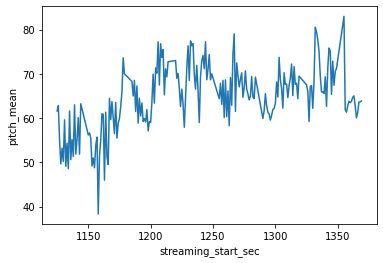

In [210]:
"""
plot time series of interest
"""
import seaborn as sns
sns.lineplot(data=assetDataSoFar_df, x="streaming_start_sec", y="pitch_mean")

In [308]:
"""
Find structural breaks: Kalman filter + CUSUM or some other online test
Inspo: file:///C:/Users/echow/AppData/Local/Temp/remotesensing-12-03135-v2.pdf
"""
from scipy.stats import multivariate_normal
from statsmodels.tsa.stattools import acovf
from scipy.ndimage.interpolation import shift
np.set_printoptions(suppress=True) 
np.random.seed(42)

# for now, keep the noise matrices as constants (can improve later)

# observations x: note, different dimension from Z (unlike sample code)
df_X = assetDataSoFar_df[['pitch_mean']]
x_obs = np.c_[df_X]
[n,d] = x_obs.shape

# create version of observations forward-filled
x_obs_nonna = x_obs.copy()
x_obs_nonna = pd.DataFrame(x_obs_nonna).ffill()[0].to_numpy().reshape(-1, 1)

# number of lags (minus one)
L = 3

### Latent state equation - vector z_t
# z_t = A_t z_{t-1} + <other regressors> + w_t
At = np.eye(L) # (L x L) - paper says to leave this as identity (random walk)
Qt = np.diag(np.ones(L)) # (L x L) covariance of errors in state eq. - TUNE THIS

### Observation equation - scalar x_t
# x_t = C_t z_t + <other regressors> + v_t
Ct = np.ones((1,L)) # (1 x L) - ARIMA lags
Rt = np.diag(np.ones(1)) # (1 x 1) - TUNE THIS 

# df_x_obs_nonna_lags = []
# for l in range(0, L):
#     curr = shift(x_obs_nonna.reshape(-1,), l, cval=np.nan)
#     df_curr = pd.DataFrame(curr, columns=["l{}".format(l)])
#     df_x_obs_nonna_lags.append(df_curr)
# df_x_obs_nonna_lags = pd.concat(df_x_obs_nonna_lags, axis=1).dropna()
# cov_mat_lags = df_x_obs_nonna_lags.cov()

# # Tune Qt with historical covariances
# Qt = cov_mat_lags

# Simulate some plausible values for Qt and Rt
# (could make Rt self-updating if time)
Qt = np.diag(np.random.gamma(1,0.1,size=L)) # needs to be symmetric to be a proper covariance matrix
Rt = np.random.gamma(3, 4, size=np.diag(np.ones(1)).shape)
At, Qt, Ct, Rt

(array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 array([[0.04692681, 0.        , 0.        ],
        [0.        , 0.30101214, 0.        ],
        [0.        , 0.        , 0.13167457]]),
 array([[1., 1., 1.]]),
 array([[4.92756047]]))

In [319]:
# Initial conditions (for the state variable z, stored in mu vars)
# z0 = x_obs[1:(L+1)]
z0 = np.repeat(1/L, L).reshape(-1, 1) # make state variable the WEIGHTS on lags NOT the LAGS themselves
P0 = Qt

#Objects to store predictions and filtering locations
Z = np.zeros((n,L))
Zpred = np.zeros((n,L))
Xpred = np.zeros((n,L))

# store predictions
z = z0 # predicted zhat, ()
P = P0 # covariance of zhat, dim(L, L)
logL = 0

timerange = range(L+1, n-1)
for i in timerange:
        
    ### Get current observations xt, t
    # if missing value NA (resulting in missing Kalman predictions) then
    # just run the prediction step and continue
    # https://stats.stackexchange.com/questions/140990/using-kalman-filters-to-impute-missing-values-in-time-series
    x = np.array(x_obs[i])
    missing = any(np.isnan(x))
    
    ### Prediction step
    ### (can update variables directly bc don't require t-1|t-1 thereafter)
    # zhat, t|t-1
    z = At.dot(z)
    # Phat, t|t-1
    P = At.dot(P).dot(At.T) + Qt
    Zpred[i,:] = z.T
    xhat = Ct.dot(z)
    Xpred[i,:] = xhat
    
    print("Predicted: {:5f}. Actual: {:5f}. (Error: {:5f})".format(float(x), float(xhat), float(x - xhat)))
    
    # handle missing
    if (missing):
        Z[i,:] = np.nan
        continue
    
    ### embed ARIMA within the Kalman filter
    Ct = x_obs_nonna[(i-L):(i)].T

    ### Calculate Kalman gain and update log-likehoo
    # Kalman gain Kt
    S = Ct.dot(P).dot(Ct.T) + Rt
    Kt = P.dot(Ct.T).dot( np.linalg.inv(S))
    # update log-likelihood
#     logL = logL + multivariate_normal.logpdf(x, mean=Ct.dot(z), cov=S) # update log-likelihood
    
    ### Measurement update step
    # update zhat, t
    # this Ct dot Z is just way too big, i.e. doesn't estimate x well.
    # So 
    z = z + Kt.dot(x - Ct.dot(z))
    Z[i,:] = z.T
    # update P, t|t
#     if (P - Kt.dot(Ct).dot(P) < 0).any():
#         raise Exception("covariance cannot be negativ")
    P = P - Kt.dot(Ct).dot(P)

Predicted: 53.200000. Actual: 61.650353. (Error: -8.450353)
Predicted: 50.200000. Actual: 53.204540. (Error: -3.004540)
Predicted: 59.600000. Actual: 50.199873. (Error: 9.400127)
Predicted: 49.125000. Actual: 59.559009. (Error: -10.434009)
Predicted: 54.333333. Actual: 49.172299. (Error: 5.161034)
Predicted: 48.571429. Actual: 54.317910. (Error: -5.746481)
Predicted: 61.600000. Actual: 48.589524. (Error: 13.010476)
Predicted: 50.625000. Actual: 61.548041. (Error: -10.923041)
Predicted: 55.142857. Actual: 50.660558. (Error: 4.482299)
Predicted: 51.333333. Actual: 55.146962. (Error: -3.813629)
Predicted: 63.000000. Actual: 51.335646. (Error: 11.664354)
Predicted: 51.888889. Actual: 62.960258. (Error: -11.071369)
Predicted: 55.166667. Actual: 51.920306. (Error: 3.246361)
Predicted: 60.111111. Actual: 55.178721. (Error: 4.932390)
Predicted: 51.857143. Actual: 60.080963. (Error: -8.223821)
Predicted: 63.250000. Actual: 51.880432. (Error: 11.369568)
Predicted: 56.200000. Actual: 63.229137. (

In [320]:
### Plot predictions
t=timerange
df_plt = pd.DataFrame({
    "time": t,
    "raw": x_obs[timerange, 0],
    "pred": Xpred[timerange, 0]
#     "predicted": Zpred[timerange,0],
#     "filtered": Z[timerange, 0]
})
df_plt.head()
px.line(df_plt, x="time", y=["raw", "pred"], template="plotly_dark")

In [321]:
### Plot prediction errors
t=timerange
df_plt = pd.DataFrame({
    "time": t,
    "error": (x_obs[timerange, 0] - Xpred[timerange, 0])
})
df_plt.head()
px.line(df_plt, x="time", y=["error"], template="plotly_dark")

In [ ]:
"""
start with one single time series - e.g. trading pitch_mean
build Bayesian forecasting model based on that pitch_mean
build trading rules on top of that, e.g. if think will go up with high confidence or rather rapidly, then submit buy signal
"""